# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import wandb
from tqdm import tqdm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing for the Wine Quality Dataset

In [35]:
f = open('WineQT.csv', 'r')
headers = f.readline().strip().split(',')
data = []
x = f.readline()
while x != '':
    data.append([float(y) for y in x.strip().split(',')])
    x = f.readline()
    
data = np.array(data)
df = pd.DataFrame(data, columns=headers)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,2.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,3.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,1592.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,1593.0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,1594.0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,1595.0


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']
Means:  [8.311111111111112, 0.5313385826771653, 0.2683639545056868, 2.5321522309711284, 0.0869326334208224, 15.615485564304462, 45.91469816272966, 0.9967304111986001, 3.3110148731408575, 0.6577077865266842, 10.442111402741325, 5.657042869641295, 804.9693788276466]
Standard Deviations:  [1.7468303726275016, 0.17955459612835617, 0.19659979421574741, 1.355324197143589, 0.04724665655215518, 10.246001115067605, 32.76778677994138, 0.0019242248343795281, 0.15659551281704315, 0.1703241580362606, 1.0817221048833654, 0.805471666920189, 463.79409851409224]
Min values:  [4.6, 0.12, 0.0, 0.9, 0.012, 1.0, 6.0, 0.9900700000000001, 2.74, 0.33, 8.4, 3.0, 0.0]
Max values:  [15.9, 1.58, 1.0, 15.5, 0.611, 68.0, 289.0, 1.00369, 4.01, 2.0, 14.9, 8.0, 1597.0]


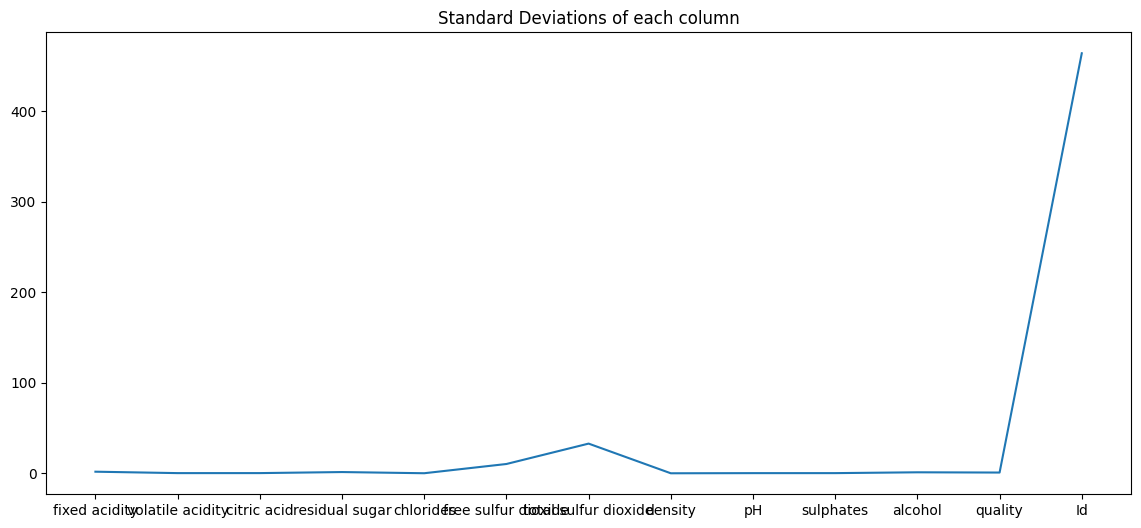

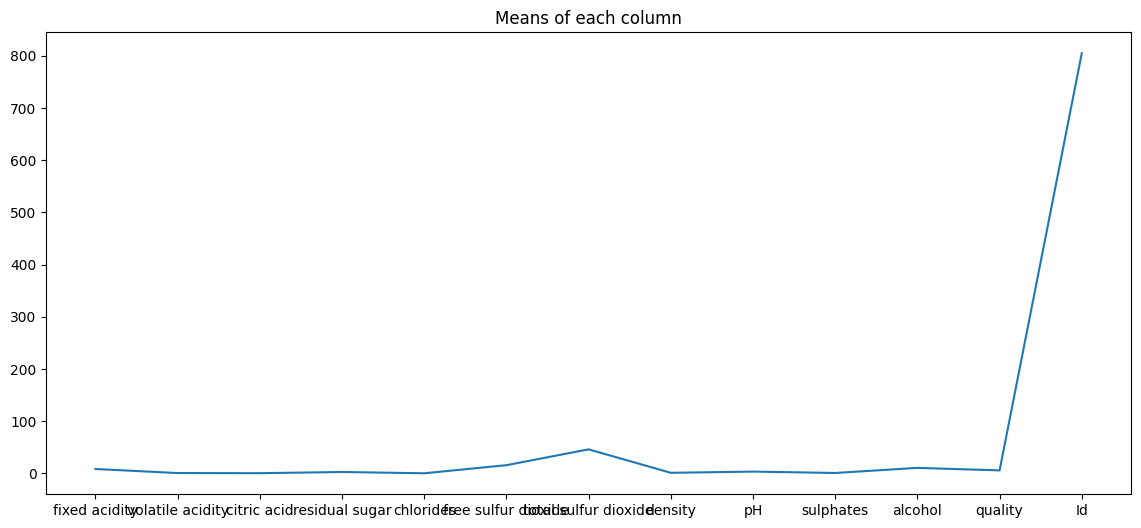

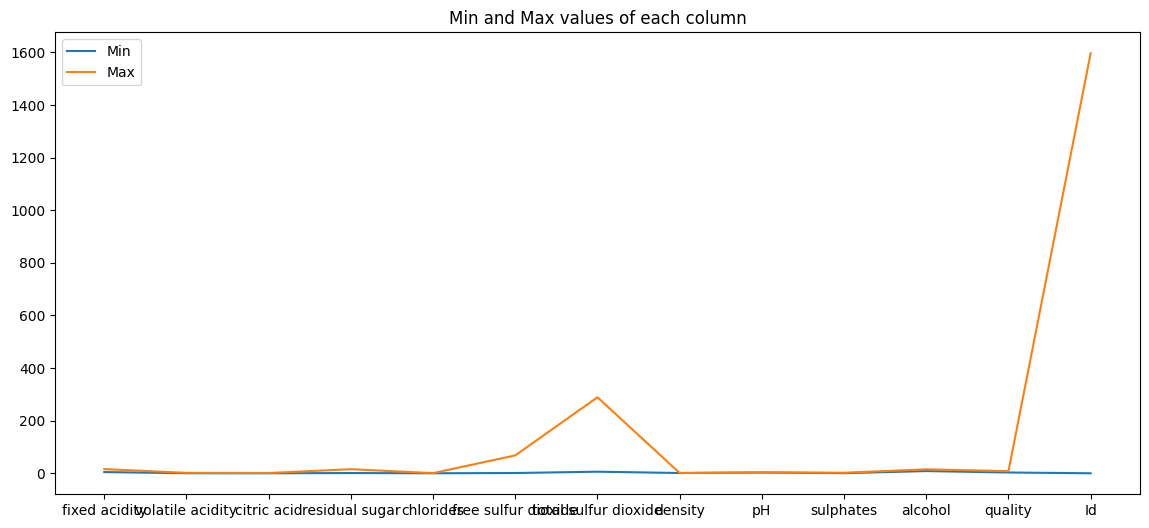

In [36]:
# finding mean of each column
means = []
for i in range(len(headers)):
    means.append(np.mean(data[:,i]))
    
# finding standard deviation of each column
stds = []
for i in range(len(headers)):
    stds.append(np.std(data[:,i]))
    
# finding min of each column
mins = []
for i in range(len(headers)):
    mins.append(np.min(data[:,i]))
    
# finding max of each column
maxs = []
for i in range(len(headers)):
    maxs.append(np.max(data[:,i]))
    
print(headers)
print('Means: ', means)
print('Standard Deviations: ', stds)
print('Min values: ', mins)
print('Max values: ', maxs)

plt.figure(figsize=(14,6))
plt.plot(headers, stds)
plt.title('Standard Deviations of each column')
plt.show()

plt.figure(figsize=(14,6))
plt.plot(headers, means)
plt.title('Means of each column')
plt.show()

# plot min and max values
plt.figure(figsize=(14,6))
plt.plot(headers, mins, label='Min')
plt.plot(headers, maxs, label='Max')
plt.legend()
plt.title('Min and Max values of each column')
plt.show()

In [31]:
# normalised_data = preprocessing.normalize(data, axis=0)
normalised_data = preprocessing.StandardScaler().fit_transform(data)
df = pd.DataFrame(normalised_data, columns=headers)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-0.815724,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-0.815724,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,0.425784,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.726993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741,0.425784,1.696940
1139,-0.865059,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937,0.425784,1.699096
1140,-1.208538,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515,-0.815724,1.701252
1141,-1.380278,0.103932,-0.856379,-0.245072,-0.527712,2.282306,0.155192,-0.836914,1.334554,0.600574,0.700632,0.425784,1.703408


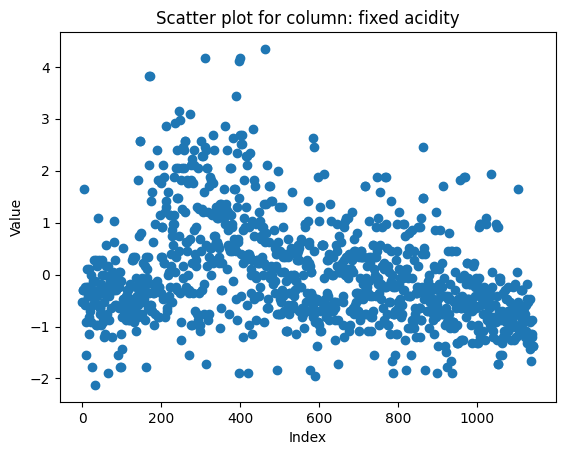

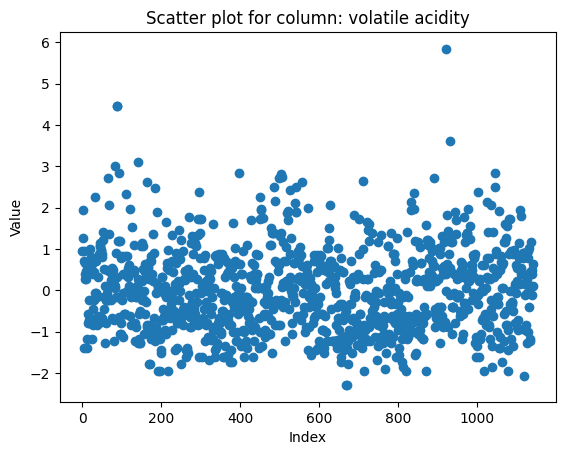

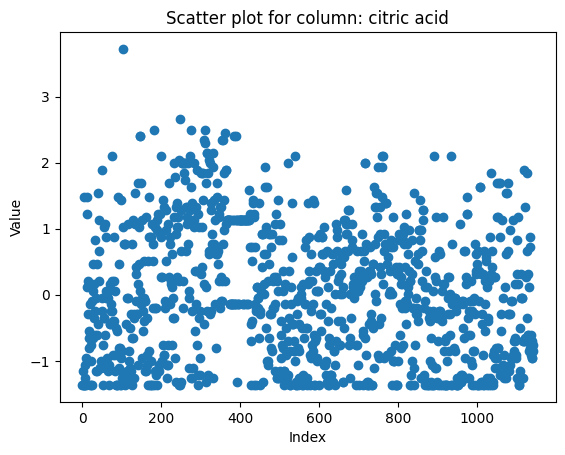

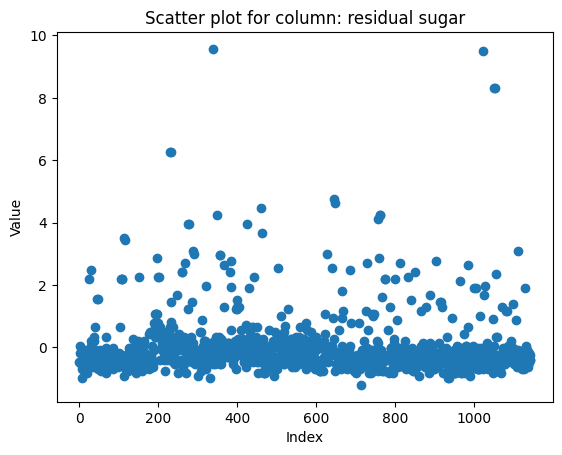

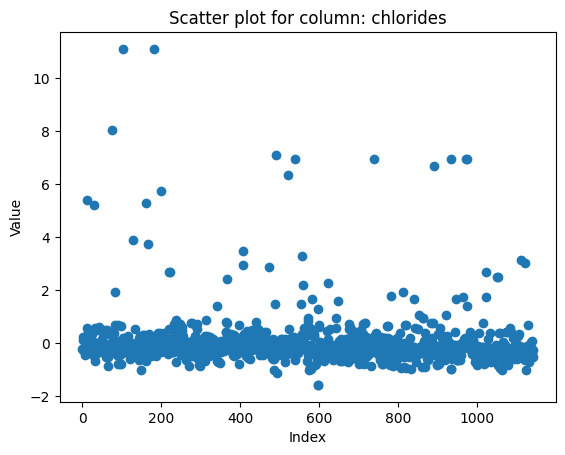

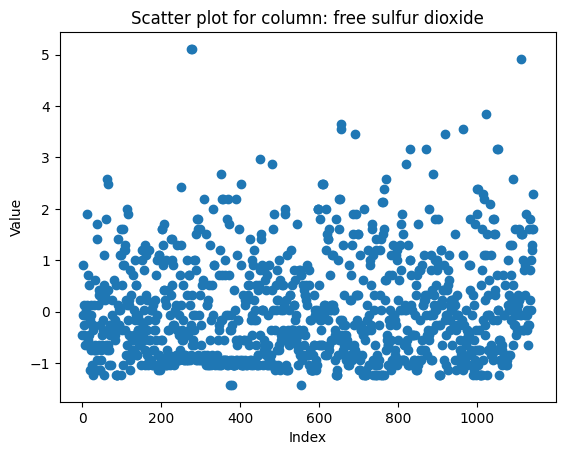

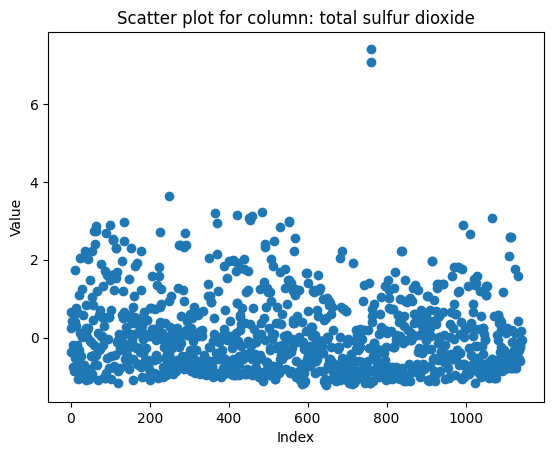

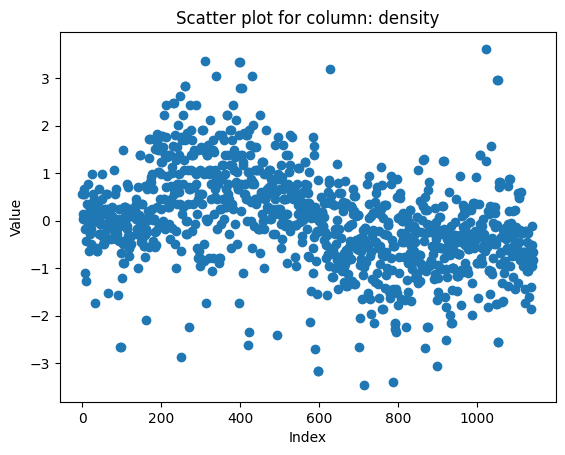

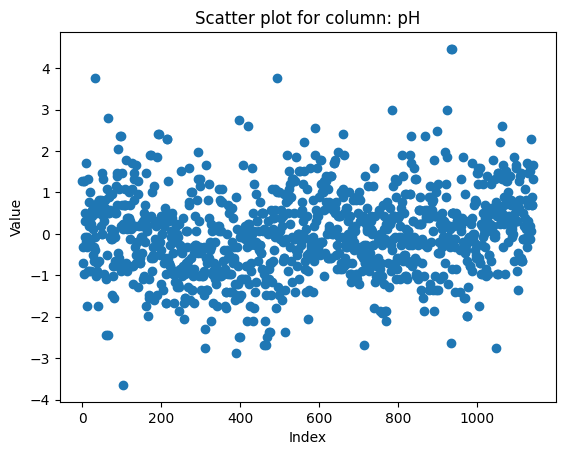

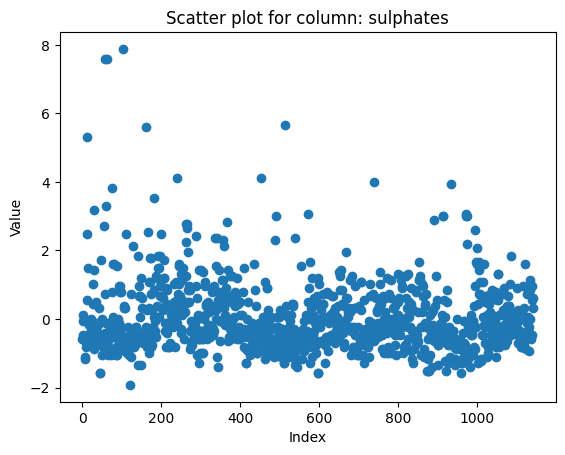

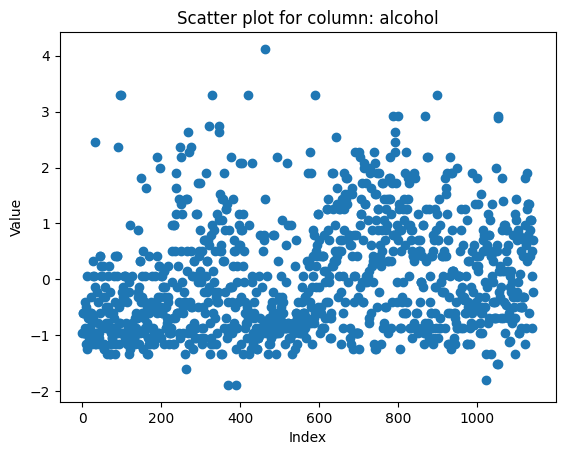

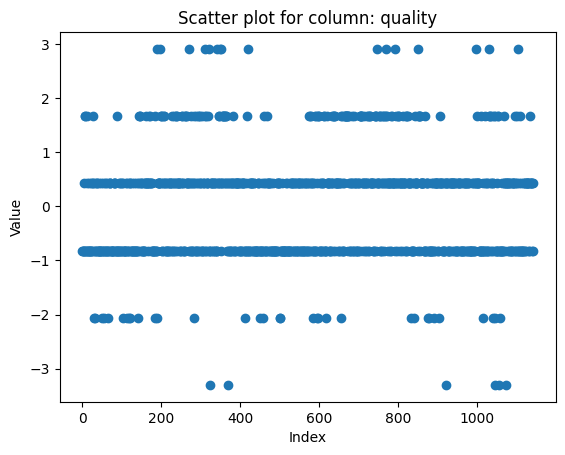

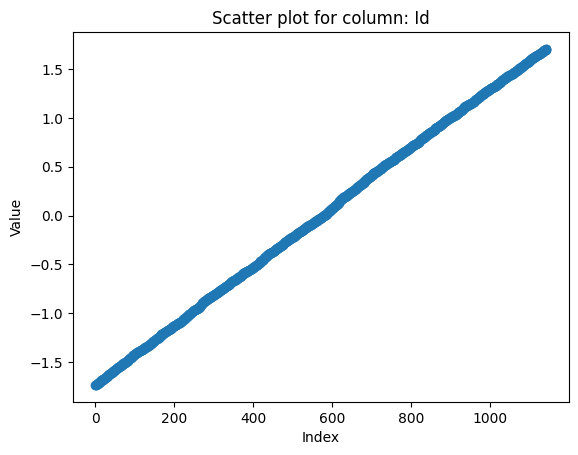

In [37]:
for i in range(len(headers)):
    plt.scatter(range(len(normalised_data[:,i])), normalised_data[:,i])
    plt.title('Scatter plot for column: '+headers[i])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

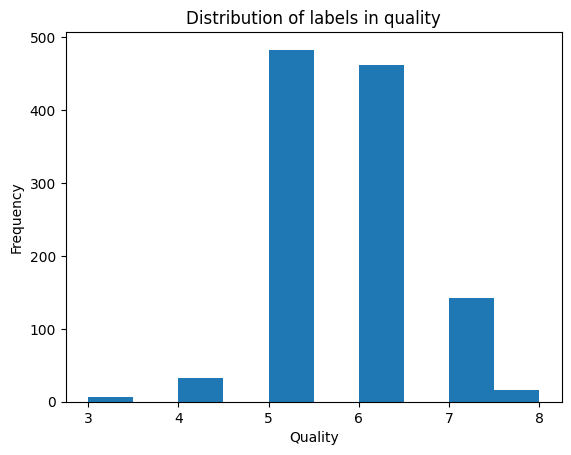

In [74]:
# distribution of labels in quality
plt.hist(data[:,-2], rwidth=1)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(np.arange(3, 9), [str(i) for i in range(3, 9)])
plt.title('Distribution of labels in quality')
plt.show()

In [17]:
# dropping the quality and Id columns
quality = data[:, -2]
data = normalised_data
headers = headers[:-2]
data = data[:, :-2]

df = pd.DataFrame(data, columns=headers)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741
1139,-0.865059,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937
1140,-1.208538,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515
1141,-1.380278,0.103932,-0.856379,-0.245072,-0.527712,2.282306,0.155192,-0.836914,1.334554,0.600574,0.700632


In [18]:
# Splitting data into train, validation and test sets

X_train, X_test, y_train, y_test = train_test_split(np.arange(data.shape[0]), np.arange(quality.shape[0]), test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
one_hot = pd.get_dummies(quality).values.astype(int)

one_hot_train = one_hot[X_train]
one_hot_val = one_hot[X_val]
one_hot_test = one_hot[X_test]

X_train = data[X_train]
X_val = data[X_val]
X_test = data[X_test]

y_train = quality[y_train]
y_val = quality[y_val]
y_test = quality[y_test]

# Multinomial Logistic Regression

## Implementation

In [19]:
class MultinomialLogisticRegression:
    def __init__(self, lr, max_epochs=10000, print_stats=False):
        self.learning_rate = lr
        self.max_epochs = max_epochs
        self.weights = None
        self.classes = None
        self.prev_loss = None
        self.print_stats = print_stats
    
    def softmax(self, x):
        # x is a 2D array
        return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)
    
    def cross_entropy_gradient(self, X, z_softmax, one_hot):                    
        p = z_softmax - one_hot
        p = p.reshape(p.shape[0], p.shape[1], 1)
        X = X.reshape(X.shape[0], 1, X.shape[1])
        
        grad = np.sum(p * X, axis=0)       
                    
        return grad
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.weights = np.random.randn(self.classes.shape[0], X.shape[1])
        self.bias = np.random.randn(self.classes.shape[0])
        epochs = 0
        
        # one hot encoding
        one_hot = pd.get_dummies(y).values.astype(int)
        
        train_losses = []
        train_accs = []
        val_accs = []
        
        while True:
            z = X @ self.weights.T + self.bias
            z_softmax = self.softmax(z)
                
            # calculate gradient
            weight_grad = self.cross_entropy_gradient(X, z_softmax, one_hot)
            bias_grad = np.sum(z_softmax - one_hot, axis=0)
                        
            # update weights
            self.weights -= self.learning_rate * weight_grad
            self.bias -= self.learning_rate * bias_grad
            
            # calculate loss            
            p = z_softmax @ one_hot.T
            loss = np.sum(-np.log(np.diag(p) / np.sum(z_softmax, axis=1)))
            
            
            epochs += 1
            if self.print_stats and (epochs % 100 == 0 or epochs == 1):
                print('Epoch: ', epochs, ' Loss: ', loss)
                        
                train_losses.append(loss)
                pred = self.predict(X)
                accuracy = metrics.accuracy_score(y, pred)
                train_accs.append(accuracy)
                
                pred = self.predict(X_val)
                accuracy = metrics.accuracy_score(y_val, pred)
                val_accs.append(accuracy)
            
            if self.prev_loss is not None and (np.abs(self.prev_loss - loss) < 1e-5 or epochs > self.max_epochs):
                self.prev_loss = loss
                break
            self.prev_loss = loss
            
        if self.print_stats:
            plt.plot(range(len(train_losses)), train_losses)
            plt.title('Training Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()
            
            plt.plot(range(len(train_accs)), train_accs, label='Training Accuracy')
            plt.plot(range(len(val_accs)), val_accs, label='Validation Accuracy')
            plt.title('Training and Validation Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.show()
                
        return self.weights, self.bias
    
    def predict(self, X):
        z = X @ self.weights.T + self.bias
        z_softmax = self.softmax(z)
                        
        y_pred = np.argmax(z_softmax, axis=1)
        return self.classes[y_pred]

## Training

Epoch:  1  Loss:  1684.5410257788046
Epoch:  100  Loss:  768.9658152312363
Epoch:  200  Loss:  673.031731766331
Epoch:  300  Loss:  646.0379030288808
Epoch:  400  Loss:  633.9149492679716
Epoch:  500  Loss:  626.9649440054673
Epoch:  600  Loss:  622.3833609705646
Epoch:  700  Loss:  619.0950155423873
Epoch:  800  Loss:  616.598238569205
Epoch:  900  Loss:  614.6243580379523
Epoch:  1000  Loss:  613.0149828414076
Epoch:  1100  Loss:  611.6701694872329
Epoch:  1200  Loss:  610.523639335988
Epoch:  1300  Loss:  609.5297385364681
Epoch:  1400  Loss:  608.6560517988106
Epoch:  1500  Loss:  607.87897381792
Epoch:  1600  Loss:  607.1809338338159
Epoch:  1700  Loss:  606.5485943717304
Epoch:  1800  Loss:  605.9716489381035
Epoch:  1900  Loss:  605.4420007937969
Epoch:  2000  Loss:  604.9531910120952
Epoch:  2100  Loss:  604.4999933655511
Epoch:  2200  Loss:  604.07812300015
Epoch:  2300  Loss:  603.684023987707
Epoch:  2400  Loss:  603.3147123415296
Epoch:  2500  Loss:  602.9676585370923
Epoch

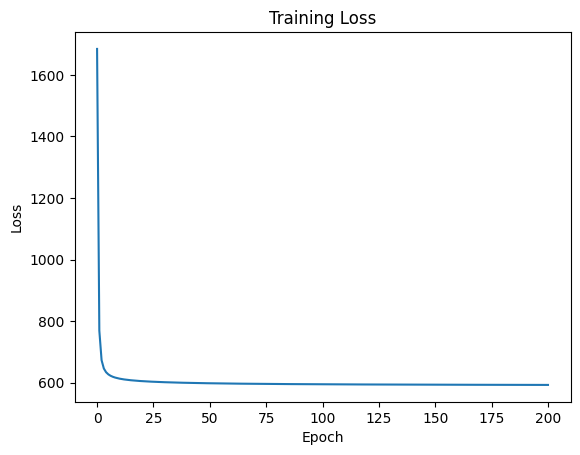

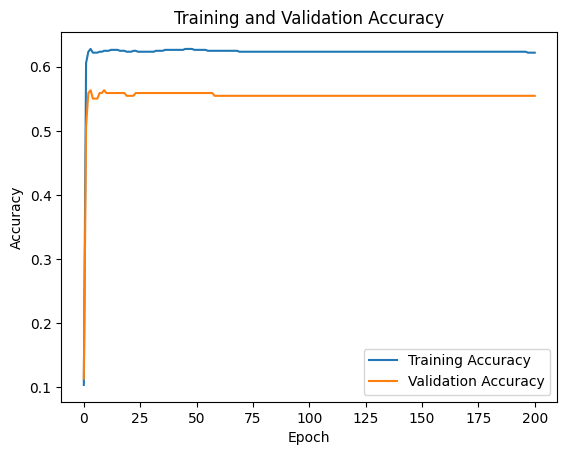

In [20]:
mlr = MultinomialLogisticRegression(1e-4, 20000, True)
w, b = mlr.fit(X_train, y_train)

In [21]:
print("Validation Set:")
y_pred = mlr.predict(X_val)
accuracy = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: ', accuracy)

clr = metrics.classification_report(y_val, y_pred, zero_division=np.nan)
print(clr)

print("Train Set:")
y_pred = mlr.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Loss: ", mlr.prev_loss)
print('Accuracy: ', accuracy)

Validation Set:
Accuracy:  0.5545851528384279
              precision    recall  f1-score   support

         3.0        nan      0.00       nan         3
         4.0       0.25      0.17      0.20         6
         5.0       0.62      0.73      0.67        90
         6.0       0.51      0.54      0.52        90
         7.0       0.52      0.29      0.37        38
         8.0        nan      0.00       nan         2

    accuracy                           0.55       229
   macro avg       0.47      0.29      0.44       229
weighted avg       0.55      0.55      0.55       229

Train Set:
Loss:  592.691483164273
Accuracy:  0.621897810218978


## Hyperparameter Tuning

In [26]:
api = wandb.Api()

runs = api.runs("sarthakchittawar/logistic-regression")
count = 0

df = None

while True:
    try:
        run = runs[count]
        count += 1
        if count == 1:
            df = pd.json_normalize([row for row in run.scan_history()])
        else:
            df = pd.concat([df, pd.json_normalize([row for row in run.scan_history()])], axis=0)
    except:
        break
    
print('Total Runs: ', count)

df = df.sort_values(by=['val_accuracy'], ascending=False)
df

row = df.iloc[0]

best_epoch = row['epoch']
best_lr = row['lr']

print('Best Epochs: ', best_epoch)
print('Best Learning Rate: ', best_lr)
print("\nFor Validation Set:")
print('Accuracy: ', row['val_accuracy'])

display(df)

Total Runs:  4
Best Epochs:  100.0
Best Learning Rate:  0.0001

For Validation Set:
Accuracy:  0.62882096069869


,lr,_step,epoch,_runtime,_timestamp,val_accuracy
0,0.0001,0,100,7.154784,1.697711e+09,0.628821
10,0.0001,10,1100,7.158376,1.697711e+09,0.628821
3,0.0001,3,400,7.157433,1.697711e+09,0.628821
4,0.0001,4,500,7.157574,1.697711e+09,0.628821
5,0.0001,5,600,7.157709,1.697711e+09,0.628821
...,...,...,...,...,...,...
4,0.0100,4,500,10.955079,1.697711e+09,0.484716
3,0.0100,3,400,10.954959,1.697711e+09,0.484716
2,0.0100,2,300,10.954832,1.697711e+09,0.484716
1,0.0100,1,200,10.954681,1.697711e+09,0.484716


## Testing

In [27]:
mlr = MultinomialLogisticRegression(best_lr, best_epoch)
w, b = mlr.fit(X_train, y_train)

print("Test Set:")
y_pred = mlr.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

clr = metrics.classification_report(y_test, y_pred, zero_division=np.nan)
print(clr)

Test Set:
Accuracy:  0.5895196506550219
              precision    recall  f1-score   support

         4.0       0.00      0.00       nan         2
         5.0       0.69      0.69      0.69        99
         6.0       0.54      0.61      0.57        99
         7.0       0.41      0.27      0.33        26
         8.0        nan      0.00       nan         3

    accuracy                           0.59       229
   macro avg       0.41      0.31      0.53       229
weighted avg       0.59      0.59      0.60       229



# Multi Layer Perceptron Classification

## Implementation

In [11]:
class MLPClassifier:
    def __init__(self, lr, activation_func, optimizer, hidden_layer_sizes, max_epochs=2000, print_stats=False, batch_size=137):
        self.learning_rate = lr
        self.activation_func = activation_func
        self.optimizer = optimizer
        self.hidden_layer_sizes = hidden_layer_sizes
        self.hidden_layers = len(hidden_layer_sizes)
        self.print_stats = print_stats
        self.max_epochs = max_epochs
        self.prev_loss = None
        self.weights = None
        self.biases = None
        self.weights_grad = None
        self.biases_grad = None
        self.batch_size = batch_size
        
    def softmax(self, x):
        # x is a 2D array
        return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(-1, 1) + 1e-15)
    
    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    
    def relu(self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.where(x > 0, x, 0)
    
    def tanh(self, x, derivative=False):
        if derivative:
            return 1 - np.tanh(x) ** 2
        return np.tanh(x)
    
    def forward_propagation(self, X):
        z = []
        # input layer
        z.append(X)
        x = np.matmul(X, self.weights[0]) + self.biases[0]            
        next_x = self.activation_funcs[0](x)
                    
        # hidden layers
        for i in range(1, self.hidden_layers):
            z.append(next_x)
            x = np.matmul(next_x, self.weights[i]) + self.biases[i]
            next_x = self.activation_funcs[i](x)
            
        # output layer
        z.append(next_x)
        x = np.matmul(next_x, self.weights[-1]) + self.biases[-1]
        final = self.softmax(x)
        
        return z, final
    
    def backpropagation(self, final, z, one_hot):
        # output layer
        p = final - one_hot
        op_grad = p
        
        # hidden layers
        for i in range(self.hidden_layers, -1, -1):
            dw = z[i].reshape(z[i].shape[0], z[i].shape[1], 1)
            op = op_grad.reshape(op_grad.shape[0], 1, op_grad.shape[1])
            self.weights_grad[i] = np.sum(dw * op, axis=0)
            self.biases_grad[i] = np.sum(op_grad, axis=0)
            if i == 0:
                break
            dz = np.matmul(op_grad, self.weights[i].T) / op_grad.shape[0]
            
            dz = dz * self.activation_funcs[i-1](z[i], derivative=True)
            
            op_grad = dz
        
        return self.weights_grad, self.biases_grad
        
    def fit(self, X, y, X_val, y_val):
        
        if self.activation_func == 'sigmoid':
            self.activation_func = self.sigmoid
        elif self.activation_func == 'relu':
            self.activation_func = self.relu
        elif self.activation_func == 'tanh':
            self.activation_func = self.tanh
        else:
            raise Exception('Invalid activation function')
        
        if self.optimizer == 'sgd':
            self.batch_size = 1
        elif self.optimizer == 'batch':
            self.batch_size = X.shape[0]
        elif self.optimizer == 'mini-batch':
            self.batch_size = self.batch_size
            if self.batch_size > X.shape[0] or self.batch_size < 1 or X.shape[0] % self.batch_size != 0:
                raise Exception('Invalid batch size')
        else:
            raise Exception('Invalid optimizer')
        
        # can non-linearize from outside
        self.activation_funcs = []
        for i in range(self.hidden_layers):
            self.activation_funcs.append(self.activation_func)                
        
        self.classes = np.unique(y)
        self.weights = []
        self.biases = []
        
        one_hot = pd.get_dummies(y).values.astype(int)
        
        weights = []
        biases = []
        weights_grad = []
        biases_grad = []
                
        # input layer
        weights.append(np.random.randn(X.shape[1], self.hidden_layer_sizes[0]))
        biases.append(np.zeros((self.hidden_layer_sizes[0])))
        weights_grad.append(np.zeros((X.shape[1], self.hidden_layer_sizes[0])))
        biases_grad.append(np.zeros((self.hidden_layer_sizes[0])))
        
        # hidden layers until last hidden layer
        for i in range(self.hidden_layers - 1):
            weights.append(np.random.randn(self.hidden_layer_sizes[i], self.hidden_layer_sizes[i+1]))
            biases.append(np.zeros((self.hidden_layer_sizes[i+1])))
            weights_grad.append(np.zeros((self.hidden_layer_sizes[i], self.hidden_layer_sizes[i+1])))
            biases_grad.append(np.zeros((self.hidden_layer_sizes[i+1])))
            
        # last hidden layer
        weights.append(np.random.randn(self.hidden_layer_sizes[-1], self.classes.shape[0]))
        biases.append(np.zeros((self.classes.shape[0])))
        weights_grad.append(np.zeros((self.hidden_layer_sizes[-1], self.classes.shape[0])))
        biases_grad.append(np.zeros((self.classes.shape[0])))
        
        losses = []
        
        self.weights = weights
        self.biases = biases
        self.weights_grad = weights_grad
        self.biases_grad = biases_grad
        
        full_X = X
        one_hot_full = one_hot
        
        epochs = 0
        val_accuracies = []
        train_accuracies = []
        while True:
            # shuffle data
            p = np.random.permutation(full_X.shape[0])
            X = full_X[p]
            one_hot = one_hot_full[p]
            
            X = X.reshape(-1, self.batch_size, X.shape[1])
            one_hot = one_hot.reshape(-1, self.batch_size, one_hot.shape[1])            
            
            sum = 0
            for i in range(X.shape[0]):
                # forward propagation
                z, final = self.forward_propagation(X[i])
                final = np.clip(final, 1e-15, 1)
                
                # backpropagation
                self.backpropagation(final, z, one_hot[i])
                    
                # update weights
                for j in range(self.hidden_layers + 1):
                    self.weights[j] -= self.learning_rate * self.weights_grad[j]
                    self.biases[j] -= self.learning_rate * self.biases_grad[j]
                                
                # calculate loss
                p = one_hot[i] * np.log(final)
                loss = -np.mean(p)
                sum += loss
            sum /= X.shape[0]
            losses.append(sum)
            loss = sum
            
            _, y_pred = self.predict(full_X)
            accuracy = metrics.accuracy_score(y, y_pred)
            train_accuracies.append(accuracy)
            _, y_pred = self.predict(X_val)
            accuracy = metrics.accuracy_score(y_val, y_pred)
            val_accuracies.append(accuracy)
                
            epochs += 1
            if self.print_stats and (epochs % 100 == 0 or epochs == 1):
                print('Epoch: ', epochs, 'Loss: ', loss, 'Train Accuracy: ', train_accuracies[-1], 'Val Accuracy: ', val_accuracies[-1])
                
            if epochs > self.max_epochs or (self.prev_loss is not None and np.abs(self.prev_loss - loss) < 1e-5):
                self.prev_loss = loss
                break
        if self.print_stats:    
            plt.plot(range(len(losses)), losses)
            plt.title('Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()              
            
        return weights, biases, train_accuracies, val_accuracies
            
    def predict(self, X):
        _, final = self.forward_propagation(X)
        y_pred = np.argmax(final, axis=1)
        
        return final, self.classes[y_pred]

Epoch:  1 Loss:  0.8944612459776815 Train Accuracy:  0.00583941605839416 Val Accuracy:  0.004366812227074236
Epoch:  100 Loss:  0.20912567373010946 Train Accuracy:  0.35912408759124087 Val Accuracy:  0.35807860262008734
Epoch:  200 Loss:  0.20194288879181 Train Accuracy:  0.37372262773722625 Val Accuracy:  0.36681222707423583
Epoch:  300 Loss:  0.19765503394855194 Train Accuracy:  0.3927007299270073 Val Accuracy:  0.39737991266375544
Epoch:  400 Loss:  0.19449749958128282 Train Accuracy:  0.4043795620437956 Val Accuracy:  0.4410480349344978
Epoch:  500 Loss:  0.19206947661336957 Train Accuracy:  0.43795620437956206 Val Accuracy:  0.45414847161572053
Epoch:  600 Loss:  0.19016614203471272 Train Accuracy:  0.4583941605839416 Val Accuracy:  0.47161572052401746
Epoch:  700 Loss:  0.18865339799390318 Train Accuracy:  0.48175182481751827 Val Accuracy:  0.4759825327510917
Epoch:  800 Loss:  0.1874360239697962 Train Accuracy:  0.49635036496350365 Val Accuracy:  0.49344978165938863
Epoch:  900 

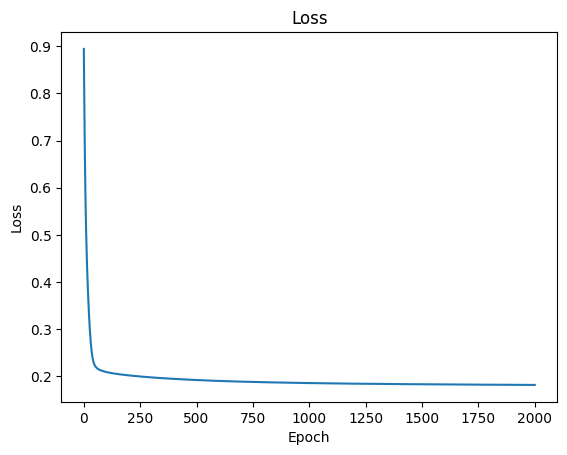

In [19]:
mlp = MLPClassifier(1e-4, 'sigmoid', 'batch', [8,8], 2000, True, 5)
w, b, batch_train, batch_val = mlp.fit(X_train, y_train, X_val, y_val)

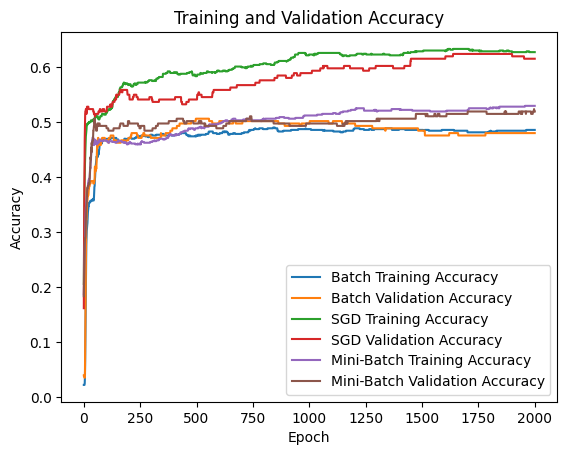

In [66]:
mlp = MLPClassifier(1e-4, 'sigmoid', 'sgd', [8,8], 2000, False)
w, b, sgd_train, sgd_val = mlp.fit(X_train, y_train, X_val, y_val)
mlp = MLPClassifier(1e-4, 'sigmoid', 'mini-batch', [8,8], 2000, False, 137)
w, b, mini_train, mini_val = mlp.fit(X_train, y_train, X_val, y_val)

plt.plot(range(len(batch_train)), batch_train, label='Batch Training Accuracy')
plt.plot(range(len(batch_val)), batch_val, label='Batch Validation Accuracy')
plt.plot(range(len(sgd_train)), sgd_train, label='SGD Training Accuracy')
plt.plot(range(len(sgd_val)), sgd_val, label='SGD Validation Accuracy')
plt.plot(range(len(mini_train)), mini_train, label='Mini-Batch Training Accuracy')
plt.plot(range(len(mini_val)), mini_val, label='Mini-Batch Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
final, y_pred_val = mlp.predict(X_val)

final, y_pred_train = mlp.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print('Train Accuracy: ', accuracy)
accuracy = metrics.accuracy_score(y_val, y_pred_val)
print('Val Accuracy: ', accuracy)

clr = metrics.classification_report(y_val, y_pred_val, zero_division=np.nan)      
print(clr)

Train Accuracy:  0.5591240875912409
Val Accuracy:  0.537117903930131
              precision    recall  f1-score   support

         3.0        nan      0.00       nan         1
         4.0        nan      0.00       nan         7
         5.0       0.56      0.70      0.62        91
         6.0       0.53      0.59      0.56        98
         7.0       0.20      0.03      0.06        31
         8.0        nan      0.00       nan         1

    accuracy                           0.54       229
   macro avg       0.43      0.22      0.41       229
weighted avg       0.50      0.54      0.51       229



## Hyperparameter Tuning on W&B

In [ ]:
# hyperparameter tuning done on ada
wandb.init(project="mlp-hyperparam-tuning")

learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
epochs = 2000
hidden_layer_sizes = [[6, 6], [8, 8], [6, 8], [6, 6, 6], [8,8,8], [6, 8, 10]]
optimizers = ['sgd', 'batch', 'mini-batch']
activation_funcs = ['sigmoid', 'tanh', 'relu']

iters = len(learning_rates)*epochs*len(hidden_layer_sizes)

with tqdm(total=iters) as pbar:
    for learning_rate in learning_rates:
        for hidden_layers in hidden_layer_sizes:
            for optimizer in optimizers:
                for activation_func in activation_funcs:

                    mlp = MLPClassifier(learning_rate, activation_func, optimizer, hidden_layers, epochs)
                    
                    _, _, train_acc, val_acc = mlp.fit(X_train, y_train, X_val, y_val)
                    final, y_pred = mlp.predict(X_val)
                    precision = metrics.precision_score(y_val, y_pred, average='macro', zero_division=np.nan)
                    recall = metrics.recall_score(y_val, y_pred, average='macro', zero_division=np.nan)
                    f1 = metrics.f1_score(y_val, y_pred, average='macro', zero_division=np.nan)
                    
                    val_loss = -np.mean(one_hot_val * np.log(final), axis=0)
                    final, _ = mlp.predict(X_train)
                    train_loss = -np.mean(one_hot_train * np.log(final), axis=0)
                    
                    for i in range(100, epochs+1, 100):
                        wandb.log({"learning_rate": learning_rate, "activation_func": activation_func, "optimizer": optimizer, "epochs": i, "hidden_layers": hidden_layers, "val_accuracy": val_acc[i-1], "train_accuracy": train_acc[i-1], "final_precision": precision, "final_recall": recall, "final_f1-score": f1, "val_loss": val_loss, "train_loss": train_loss})
            pbar.update(1)      
                    

Total Runs:  219
Best Epochs:  1600
Best Learning Rate:  0.0001
Best Activation Function:  sigmoid
Best Optimizer:  sgd
Best Hidden Layers:  [6, 6]

For Validation Set:
Accuracy:  0.6681222707423581
Precision:  0.6723676155494338
Recall:  0.31906058543226684
F1-score:  0.7192978466995612


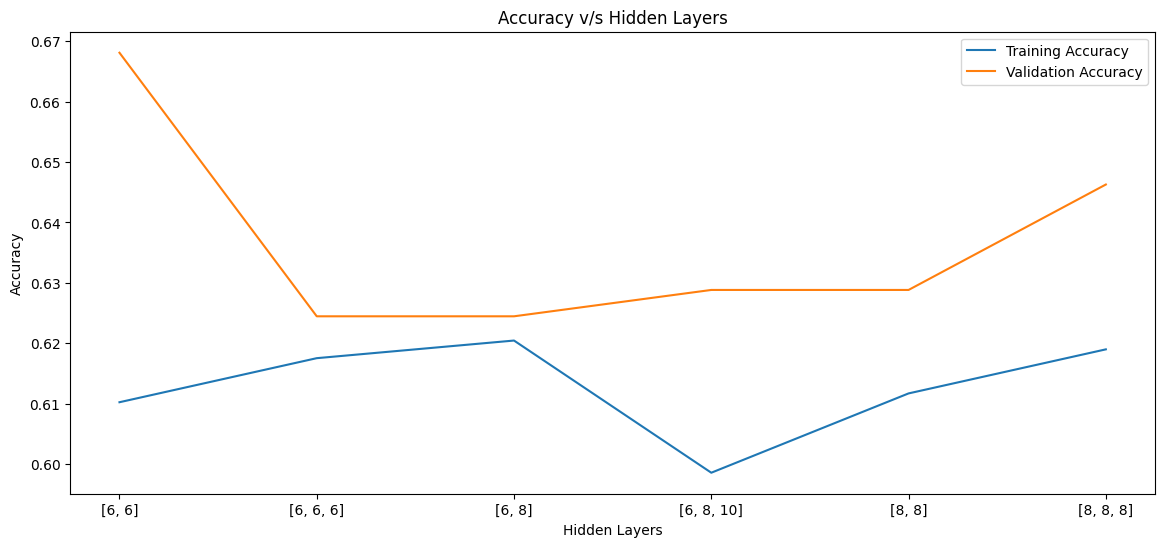

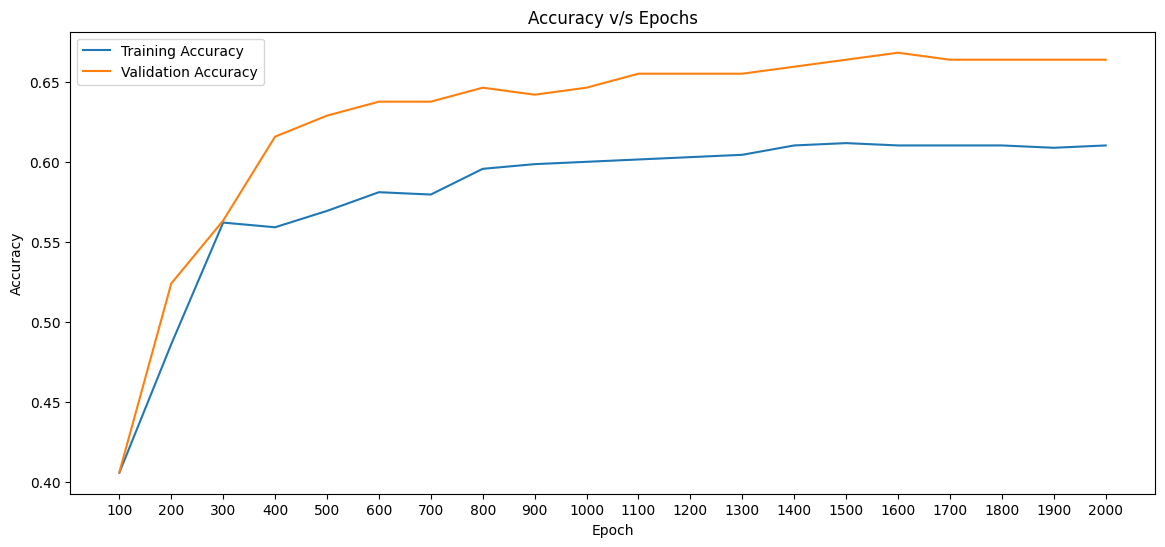

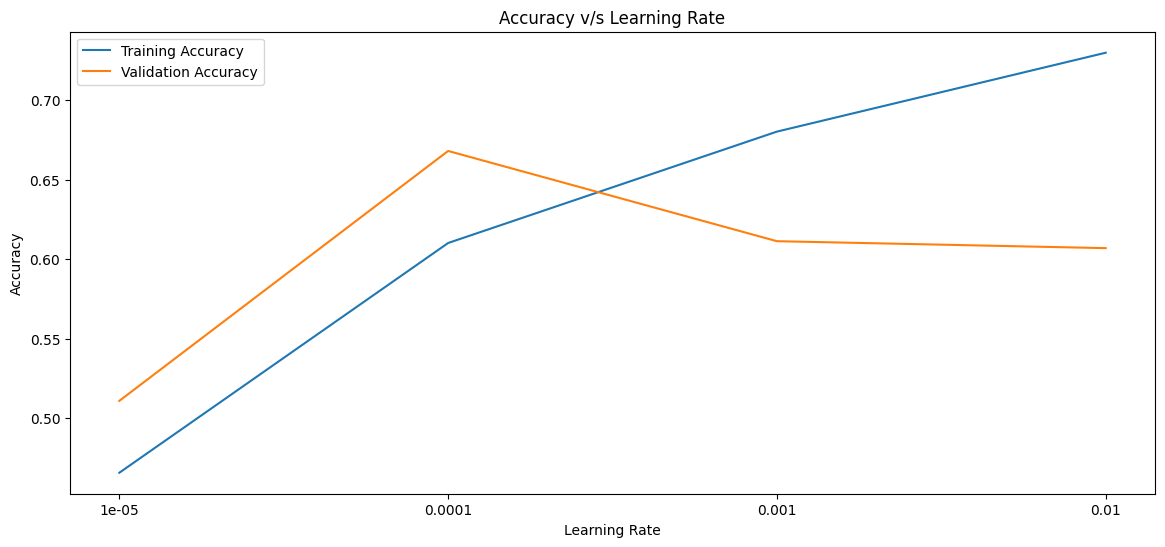

,val_accuracy,train_accuracy,final_precision,final_recall,final_f1-score,epochs,learning_rate,activation_func,optimizer,hidden_layers
1401,0.668122,0.559124,0.527696,0.322600,0.511953,200,0.0010,tanh,mini-batch,"[8, 8]"
2307,0.668122,0.582482,0.596148,0.347697,0.571593,800,0.0001,tanh,mini-batch,"[6, 6]"
2175,0.668122,0.610219,0.672368,0.319061,0.719298,1600,0.0001,sigmoid,sgd,"[6, 6]"
2309,0.668122,0.586861,0.596148,0.347697,0.571593,1000,0.0001,tanh,mini-batch,"[6, 6]"
46,0.663755,0.690511,0.341734,0.301248,0.487719,700,0.0100,relu,sgd,"[6, 6]"
...,...,...,...,...,...,...,...,...,...,...
1002,0.000000,0.005839,0.000000,0.000000,NaN,300,0.0100,relu,batch,"[6, 8, 10]"
177,0.000000,0.005839,0.000000,0.000000,NaN,1800,0.0100,relu,mini-batch,"[6, 6]"
176,0.000000,0.005839,0.000000,0.000000,NaN,1700,0.0100,relu,mini-batch,"[6, 6]"
175,0.000000,0.005839,0.000000,0.000000,NaN,1600,0.0100,relu,mini-batch,"[6, 6]"


In [12]:
api = wandb.Api()

runs = api.runs("sarthakchittawar/mlp-classifier")
count = 0

while True:
    try:
        run = runs[count]
        count += 1
    except:
        break

r = run.scan_history()
x = [row for row in r]
df = pd.json_normalize(x)
    
print('Total Runs: ', count)

df = df.sort_values(by=['val_accuracy'], ascending=False)
df

row = df.iloc[0]

epochs = row['epochs']
learning_rate = row['learning_rate']
activation_func = row['activation_func']
optimizer = row['optimizer']
hidden_layers = row['hidden_layers']

print('Best Epochs: ', epochs)
print('Best Learning Rate: ', learning_rate)
print('Best Activation Function: ', activation_func)
print('Best Optimizer: ', optimizer)
print('Best Hidden Layers: ', hidden_layers)
print("\nFor Validation Set:")
print('Accuracy: ', row['val_accuracy'])
print('Precision: ', row['final_precision'])
print('Recall: ', row['final_recall'])
print('F1-score: ', row['final_f1-score'])

# # find all rows with given parameters of hidden layers and epochs i.e. in one go
df2 = df
df = df[(df['epochs'] == epochs) & (df['learning_rate'] == learning_rate) & (df['activation_func'] == activation_func) & (df['optimizer'] == optimizer)]
df = df.sort_values(by=['hidden_layers'])
# plot train and val accuracy for each hidden layer size
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_accuracy'])), df['train_accuracy'], label='Training Accuracy')
plt.plot(range(len(df['val_accuracy'])), df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy v/s Hidden Layers')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.xticks(range(len(df['hidden_layers'])), df['hidden_layers'])
plt.legend()
plt.show()

b=[]
for i in df2['hidden_layers']:
    if i == hidden_layers:
        b.append(True)
    else:
        b.append(False)

df = df2[b & (df2['learning_rate'] == learning_rate) & (df2['activation_func'] == activation_func) & (df2['optimizer'] == optimizer)]
df = df.sort_values(by=['epochs'])
# plot train and val accuracy for each epoch
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_accuracy'])), df['train_accuracy'], label='Training Accuracy')
plt.plot(range(len(df['val_accuracy'])), df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(len(df['epochs'])), df['epochs'])
plt.legend()
plt.show()

df = df2[(df2['epochs'] == epochs) & b & (df2['activation_func'] == activation_func) & (df2['optimizer'] == optimizer)]
df = df.sort_values(by=['learning_rate'])
# plot train and val accuracy for each learning rate
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_accuracy'])), df['train_accuracy'], label='Training Accuracy')
plt.plot(range(len(df['val_accuracy'])), df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy v/s Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(range(len(df['learning_rate'])), df['learning_rate'])
plt.legend()
plt.show()

df2 = df2[['val_accuracy', 'train_accuracy', 'final_precision', 'final_recall', 'final_f1-score', 'epochs', 'learning_rate', 'activation_func', 'optimizer', 'hidden_layers']]
display(df2)

## Testing & Comparison with Logistic Regression

In [13]:
mlp = MLPClassifier(learning_rate, activation_func, optimizer, hidden_layers, epochs, False)

mlp.fit(X_train, y_train, X_val, y_val)

final, y_pred = mlp.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

clr = metrics.classification_report(y_test, y_pred, zero_division=np.nan)
print(clr)

              precision    recall  f1-score   support

         3.0        nan      0.00       nan         1
         4.0        nan      0.00       nan         8
         5.0       0.68      0.73      0.70        95
         6.0       0.51      0.67      0.58        90
         7.0       0.50      0.16      0.24        31
         8.0        nan      0.00       nan         4

    accuracy                           0.59       229
   macro avg       0.56      0.26      0.51       229
weighted avg       0.58      0.59      0.58       229



In [17]:
# compare with my logistic regression
mlr = MultinomialLogisticRegression(1e-3, 5000, False)
w, b = mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
clr1 = metrics.classification_report(y_test, y_pred, zero_division=np.nan)

print('Logistic Regression:')
print(clr1)

Logistic Regression:
              precision    recall  f1-score   support

         3.0       0.00      0.00       nan         1
         4.0        nan      0.00       nan         8
         5.0       0.65      0.74      0.69        95
         6.0       0.54      0.62      0.58        90
         7.0       0.53      0.29      0.38        31
         8.0        nan      0.00       nan         4

    accuracy                           0.59       229
   macro avg       0.43      0.27      0.55       229
weighted avg       0.59      0.59      0.60       229



## Multi Label Classification using MLP 

### Implementation

In [2]:
class MultiLabel_MLPClassifier:
    def __init__(self, lr, activation_func, optimizer, hidden_layer_sizes, max_epochs=2000, print_stats=False, batch_size=100):
        self.learning_rate = lr
        self.activation_func = activation_func
        self.optimizer = optimizer
        self.hidden_layer_sizes = hidden_layer_sizes
        self.hidden_layers = len(hidden_layer_sizes)
        self.print_stats = print_stats
        self.max_epochs = max_epochs
        self.prev_loss = None
        self.weights = None
        self.biases = None
        self.weights_grad = None
        self.biases_grad = None
        self.batch_size = batch_size
        
    # def softmax(self, x):
    #     # x is a 2D array
    #     return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(-1, 1) + 1e-15)
    
    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    
    def relu(self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.where(x > 0, x, 0)
    
    def tanh(self, x, derivative=False):
        if derivative:
            return 1 - np.tanh(x) ** 2
        return np.tanh(x)
    
    def forward_propagation(self, X):
        z = []
        # input layer
        z.append(X)
        x = np.matmul(X, self.weights[0]) + self.biases[0]
        next_x = self.activation_funcs[0](x)
                    
        # hidden layers
        for i in range(1, self.hidden_layers):
            z.append(next_x)
            x = np.matmul(next_x, self.weights[i]) + self.biases[i]
            next_x = self.activation_funcs[i](x)
            
        # output layer
        z.append(next_x)
        x = np.matmul(next_x, self.weights[-1]) + self.biases[-1]
        final = self.sigmoid(x)
        
        return z, final
    
    def backpropagation(self, final, z, one_hot):
        # output layer
        p = final - one_hot
        op_grad = p
        
        # hidden layers
        for i in range(self.hidden_layers, -1, -1):
            dw = z[i].reshape(z[i].shape[0], z[i].shape[1], 1)
            op = op_grad.reshape(op_grad.shape[0], 1, op_grad.shape[1])
            self.weights_grad[i] = np.sum(dw * op, axis=0)
            self.biases_grad[i] = np.sum(op_grad, axis=0)
            if i == 0:
                break
            dz = np.matmul(op_grad, self.weights[i].T) / op_grad.shape[0]
            
            dz = dz * self.activation_funcs[i-1](z[i], derivative=True)
            
            op_grad = dz
        
        return self.weights_grad, self.biases_grad
        
    def fit(self, X, y, X_val, y_val):
        
        if self.activation_func == 'sigmoid':
            self.activation_func = self.sigmoid
        elif self.activation_func == 'relu':
            self.activation_func = self.relu
        elif self.activation_func == 'tanh':
            self.activation_func = self.tanh
        else:
            raise Exception('Invalid activation function')
        
        if self.optimizer == 'sgd':
            self.batch_size = 1
        elif self.optimizer == 'batch':
            self.batch_size = X.shape[0]
        elif self.optimizer == 'mini-batch':
            self.batch_size = self.batch_size
            if self.batch_size > X.shape[0] or self.batch_size < 1 or X.shape[0] % self.batch_size != 0:
                raise Exception('Invalid batch size')
        else:
            raise Exception('Invalid optimizer')
        
        # can non-linearize from outside
        self.activation_funcs = []
        for i in range(self.hidden_layers):
            self.activation_funcs.append(self.activation_func)                
        
        classes = []
        for i in y:
            for j in i:
                if j not in classes:
                    classes.append(j)

        self.classes = np.unique(classes)
        self.weights = []
        self.biases = []
        
        # one_hot = pd.get_dummies(y).values.astype(int)
        one_hot = MultiLabelBinarizer(classes=self.classes).fit_transform(y)
        one_hot_val = MultiLabelBinarizer(classes=self.classes).fit_transform(y_val)
        
        weights = []
        biases = []
        weights_grad = []
        biases_grad = []
                
        # input layer
        weights.append(np.random.randn(X.shape[1], self.hidden_layer_sizes[0]))
        biases.append(np.zeros((self.hidden_layer_sizes[0])))
        weights_grad.append(np.zeros((X.shape[1], self.hidden_layer_sizes[0])))
        biases_grad.append(np.zeros((self.hidden_layer_sizes[0])))
        
        # hidden layers until last hidden layer
        for i in range(self.hidden_layers - 1):
            weights.append(np.random.randn(self.hidden_layer_sizes[i], self.hidden_layer_sizes[i+1]))
            biases.append(np.zeros((self.hidden_layer_sizes[i+1])))
            weights_grad.append(np.zeros((self.hidden_layer_sizes[i], self.hidden_layer_sizes[i+1])))
            biases_grad.append(np.zeros((self.hidden_layer_sizes[i+1])))
            
        # last hidden layer
        weights.append(np.random.randn(self.hidden_layer_sizes[-1], self.classes.shape[0]))
        biases.append(np.zeros((self.classes.shape[0])))
        weights_grad.append(np.zeros((self.hidden_layer_sizes[-1], self.classes.shape[0])))
        biases_grad.append(np.zeros((self.classes.shape[0])))
        
        losses = []
        
        self.weights = weights
        self.biases = biases
        self.weights_grad = weights_grad
        self.biases_grad = biases_grad
        
        full_X = X
        one_hot_full = one_hot
        
        epochs = 0
        val_accuracies = []
        train_accuracies = []
        while True:
            # shuffle data
            p = np.random.permutation(full_X.shape[0])
            X = full_X[p]
            one_hot = one_hot_full[p]
            
            X = X.reshape(-1, self.batch_size, X.shape[1])
            one_hot = one_hot.reshape(-1, self.batch_size, one_hot.shape[1])            
            
            sum = 0
            for i in range(X.shape[0]):
                # forward propagation
                z, final = self.forward_propagation(X[i])
                final = np.clip(final, 1e-15, 1)
                
                # backpropagation
                self.backpropagation(final, z, one_hot[i])
                    
                # update weights
                for j in range(self.hidden_layers + 1):
                    self.weights[j] -= self.learning_rate * self.weights_grad[j]
                    self.biases[j] -= self.learning_rate * self.biases_grad[j]
                                
                # calculate loss
                p = one_hot[i] * np.log(final) + (1 - one_hot[i]) * np.log(1 - final)
                loss = -np.mean(p)
                sum += loss
            sum /= X.shape[0]
            losses.append(sum)
            loss = sum
            
            _, y_pred, _ = self.predict(full_X)
            # hl = 0
            # for i in range(len(y)):
            #     hl += metrics.hamming_loss(one_hot_full[i], y_pred[i])
            accuracy = 1 - metrics.hamming_loss(one_hot_full, y_pred)
            train_accuracies.append(accuracy)
            _, y_pred, _ = self.predict(X_val)
            # hl = 0
            # for i in range(len(y_val)):
            #     hl += metrics.hamming_loss(one_hot_val[i], y_pred[i])
            accuracy = 1 - metrics.hamming_loss(one_hot_val, y_pred)
            val_accuracies.append(accuracy)
                
            epochs += 1
            if self.print_stats and (epochs % 100 == 0 or epochs == 1):
                print('Epoch: ', epochs, 'Loss: ', loss, 'Train Accuracy: ', train_accuracies[-1], 'Val Accuracy: ', val_accuracies[-1])
                
            if epochs > self.max_epochs or (self.prev_loss is not None and np.abs(self.prev_loss - loss) < 1e-5):
                self.prev_loss = loss
                break
        if self.print_stats:    
            plt.plot(range(len(losses)), losses)
            plt.title('Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()              
            
        return weights, biases, train_accuracies, val_accuracies
            
    def predict(self, X):
        _, final = self.forward_propagation(X)
        y_pred = np.where(final > 0.5, 1, 0)
        labels = [self.classes[np.where(row == 1)[0]] for row in y_pred]
        
        return final, y_pred, labels

### Data Preprocessing for advertisement.csv

In [9]:
df = pd.read_csv('advertisement.csv')
X = df.drop('labels', axis=1)
y = df.iloc[:, -1].values
display(X)

for i in range(len(y)):
    y[i] = np.array(y[i].split(' '))
y = np.array(y)

s = X.shape[1]
# print(LabelEncoder().fit_transform(X.values[:, 3]))
X['gender'] = LabelEncoder().fit_transform(X.values[:, 1])
X['education'] = LabelEncoder().fit_transform(X.values[:, 3])
X['married'] = LabelEncoder().fit_transform(X.values[:, 4])
X['occupation'] = LabelEncoder().fit_transform(X.values[:, 7])
X['most bought item'] = LabelEncoder().fit_transform(X.values[:, 9])

df = X.drop(['city'], axis=1)
X = df.values.astype(float)
display(df)

X = preprocessing.StandardScaler().fit_transform(X)
df = pd.DataFrame(X)
display(df)

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet
...,...,...,...,...,...,...,...,...,...,...
995,61,Male,34246.773063,Master,True,3,Solisfurt,HR,103.357441,bed
996,56,Female,45494.225591,Bachelor,False,0,Dawsonmouth,Engineer,85.159023,biscuits
997,64,Female,68740.442006,PhD,True,0,Lake Garyport,Salesman,101.434650,bat
998,18,Female,44348.446680,Bachelor,True,0,Ericfurt,Retired,97.649988,perfume


,age,gender,income,education,married,children,occupation,purchase_amount,most bought item
0,45,1,61271.953359,2,0,3,2,87.697118,16
1,24,0,53229.101074,1,0,1,1,115.135586,13
2,45,0,30066.046684,0,1,3,3,101.694559,3
3,19,1,48950.246384,3,0,0,6,97.964887,14
4,29,0,44792.627094,2,0,0,1,86.847281,4
...,...,...,...,...,...,...,...,...,...
995,61,1,34246.773063,2,1,3,4,103.357441,2
996,56,0,45494.225591,0,0,0,3,85.159023,3
997,64,0,68740.442006,3,1,0,8,101.434650,1
998,18,0,44348.446680,0,1,0,7,97.649988,19


,0,1,2,3,4,5,6,7,8
0,0.302178,1.012073,1.205533,0.420034,-0.980196,1.321889,-0.972781,-0.658899,0.647907
1,-1.221775,-0.988071,0.392264,-0.481326,-0.980196,-0.450080,-1.287597,0.690187,0.215489
2,0.302178,-0.988071,-1.949916,-1.382687,1.020204,1.321889,-0.657965,0.029323,-1.225907
3,-1.584621,1.012073,-0.040401,1.321394,-0.980196,-1.336065,0.286482,-0.154056,0.359628
4,-0.858929,-0.988071,-0.460807,0.420034,-0.980196,-1.336065,-1.287597,-0.700683,-1.081767
...,...,...,...,...,...,...,...,...,...
995,1.463285,1.012073,-1.527173,0.420034,1.020204,1.321889,-0.343149,0.111083,-1.370046
996,1.100439,-0.988071,-0.389864,-1.382687,-0.980196,-1.336065,-0.657965,-0.783691,-1.225907
997,1.680993,-0.988071,1.960725,1.321394,1.020204,-1.336065,0.916114,0.016544,-1.514186
998,-1.657190,-0.988071,-0.505722,-1.382687,1.020204,-1.336065,0.601298,-0.169539,1.080326


In [10]:
# Splitting data into train, validation and test sets

X_train, X_test, y_train, y_test = train_test_split(np.arange(X.shape[0]), np.arange(y.shape[0]), test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
classes = []
for i in y:
    for j in i:
        if j not in classes:
            classes.append(j)
            
classes = np.array(classes)
one_hot = MultiLabelBinarizer(classes=classes).fit_transform(y)

one_hot_train = one_hot[X_train]
one_hot_val = one_hot[X_val]
one_hot_test = one_hot[X_test]

X_train = X[X_train]
X_val = X[X_val]
X_test = X[X_test]

y_train = y[y_train]
y_val = y[y_val]
y_test = y[y_test]

### Hyperparameter Tuning

Epoch:  1 Loss:  0.9148970741771446 Train Accuracy:  0.5091666666666667 Val Accuracy:  0.513125
Epoch:  100 Loss:  0.6407534500380683 Train Accuracy:  0.65875 Val Accuracy:  0.661875
Epoch:  200 Loss:  0.6387509810316252 Train Accuracy:  0.6597916666666667 Val Accuracy:  0.66125
Epoch:  300 Loss:  0.6380208887738594 Train Accuracy:  0.6599999999999999 Val Accuracy:  0.66125
Epoch:  400 Loss:  0.6376309425985072 Train Accuracy:  0.6597916666666667 Val Accuracy:  0.66125
Epoch:  500 Loss:  0.6373854324769627 Train Accuracy:  0.6597916666666667 Val Accuracy:  0.66125
Epoch:  600 Loss:  0.6372161504466385 Train Accuracy:  0.6597916666666667 Val Accuracy:  0.6625
Epoch:  700 Loss:  0.6370912356568846 Train Accuracy:  0.6597916666666667 Val Accuracy:  0.6625
Epoch:  800 Loss:  0.6369935947313088 Train Accuracy:  0.6595833333333334 Val Accuracy:  0.663125
Epoch:  900 Loss:  0.6369134363131264 Train Accuracy:  0.6597916666666667 Val Accuracy:  0.663125
Epoch:  1000 Loss:  0.6368449558370858 Tr

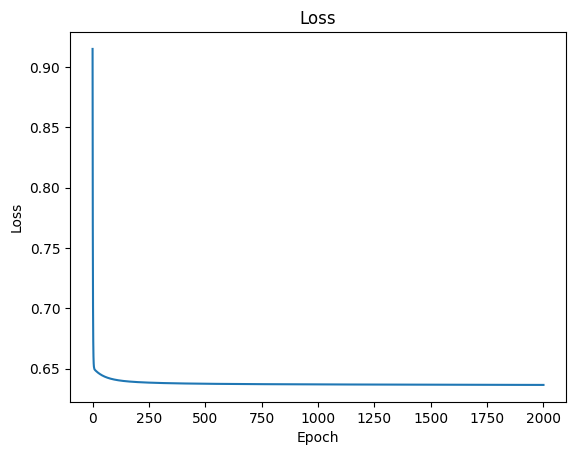

In [23]:
mlp = MultiLabel_MLPClassifier(1e-3, 'sigmoid', 'batch', [6,6], 2000, True)
w, b, batch_train, batch_val = mlp.fit(X_train, y_train, X_val, y_val)

,train_accuracy,_timestamp,activation_func,final_precision,final_f1-score-micro,hidden_layers,_runtime,optimizer,final_f1-score-macro,val_accuracy,epochs,val_loss,learning_rate,_step,train_loss,final_recall
0,0.552292,1.697564e+09,relu,0.136015,0.191633,"[6, 8, 10]",17.144892,mini-batch,0.177484,0.569375,100,0.70789,0.00001,0,0.698062,0.324201
1,0.551250,1.697564e+09,relu,0.136015,0.191633,"[6, 8, 10]",17.145080,mini-batch,0.177484,0.579375,200,0.70789,0.00001,1,0.698062,0.324201
2,0.548958,1.697564e+09,relu,0.136015,0.191633,"[6, 8, 10]",17.145234,mini-batch,0.177484,0.565000,300,0.70789,0.00001,2,0.698062,0.324201
3,0.556667,1.697564e+09,relu,0.136015,0.191633,"[6, 8, 10]",17.145376,mini-batch,0.177484,0.568125,400,0.70789,0.00001,3,0.698062,0.324201
4,0.566458,1.697564e+09,relu,0.136015,0.191633,"[6, 8, 10]",17.145510,mini-batch,0.177484,0.580000,500,0.70789,0.00001,4,0.698062,0.324201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.687708,1.697547e+09,sigmoid,0.128352,0.190071,"[6, 6]",144.285610,sgd,0.195908,0.658125,1600,0.703288,0.01000,15,0.74351,0.36612
16,0.688542,1.697547e+09,sigmoid,0.128352,0.190071,"[6, 6]",144.285743,sgd,0.195908,0.666875,1700,0.703288,0.01000,16,0.74351,0.36612
17,0.690208,1.697547e+09,sigmoid,0.128352,0.190071,"[6, 6]",144.285872,sgd,0.195908,0.663125,1800,0.703288,0.01000,17,0.74351,0.36612
18,0.690833,1.697547e+09,sigmoid,0.128352,0.190071,"[6, 6]",144.286000,sgd,0.195908,0.661875,1900,0.703288,0.01000,18,0.74351,0.36612


Total Runs:  216
Best Epochs:  1000
Best Learning Rate:  0.001
Best Activation Function:  sigmoid
Best Optimizer:  sgd
Best Hidden Layers:  [8, 8]

For Validation Set:
Accuracy:  0.68125
Precision:  0.10344827586206896
Recall:  0.2523364485981308
F1-score (Micro):  0.1467391304347826
F1-score (Macro):  0.15563570149755337


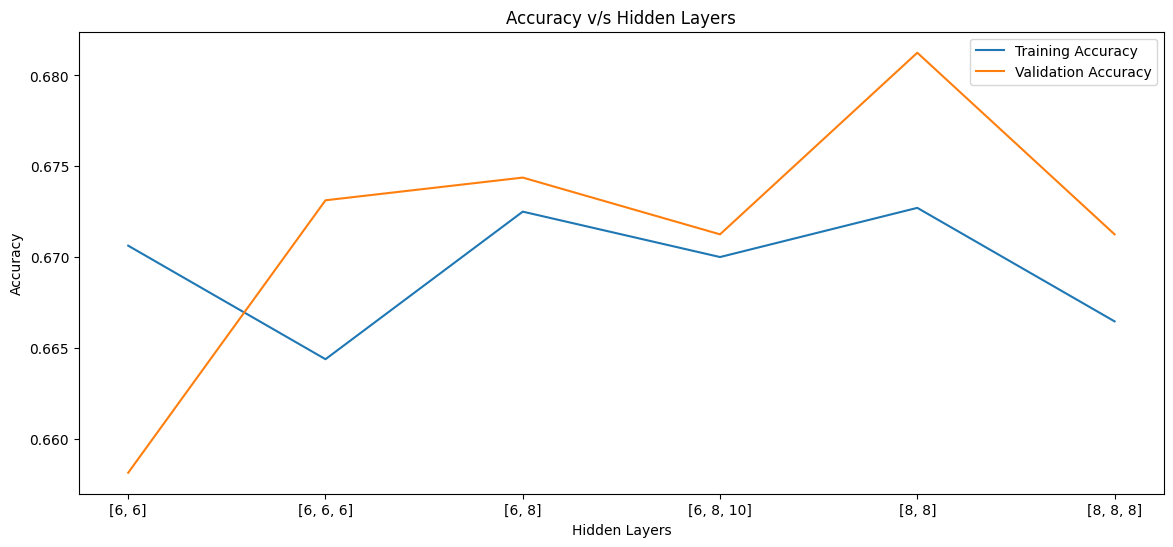

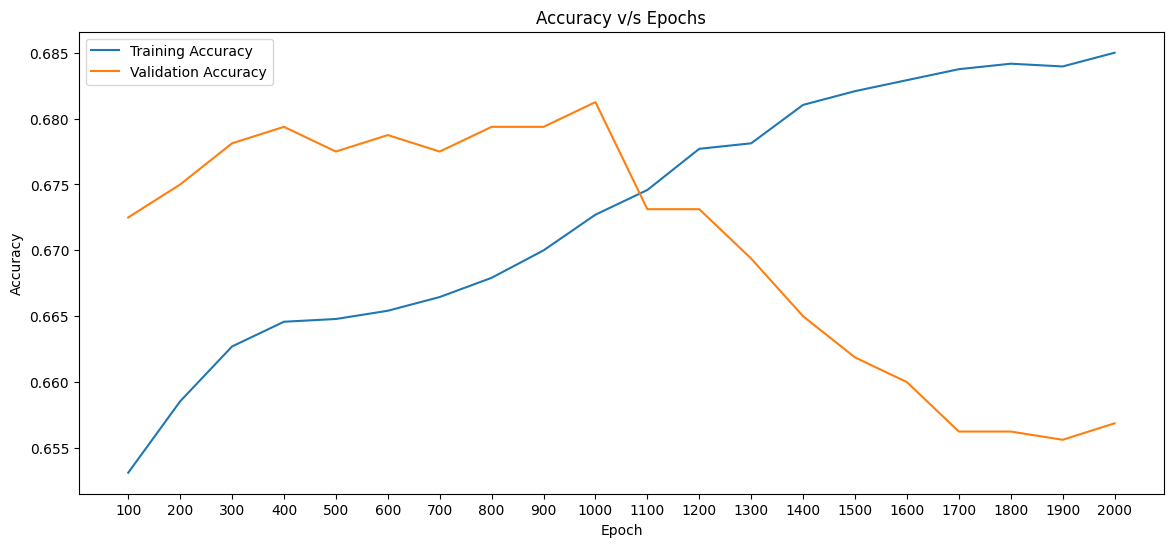

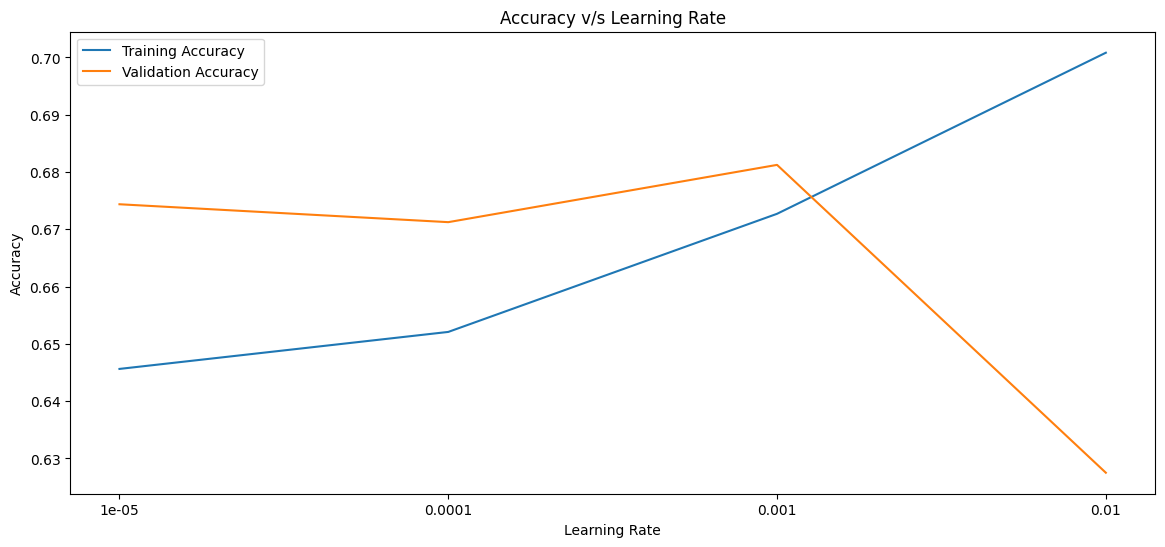

,val_accuracy,train_accuracy,final_precision,final_recall,final_f1-score-micro,final_f1-score-macro,epochs,learning_rate,activation_func,optimizer,hidden_layers
9,0.681250,0.672708,0.103448,0.252336,0.146739,0.155636,1000,0.00100,sigmoid,sgd,"[8, 8]"
7,0.681250,0.676042,0.114943,0.258621,0.159151,0.173616,800,0.01000,tanh,sgd,"[6, 8]"
9,0.680625,0.667500,0.114943,0.258621,0.159151,0.173616,1000,0.01000,tanh,sgd,"[6, 8]"
6,0.680625,0.655000,0.067050,0.307018,0.110063,0.142898,700,0.01000,sigmoid,batch,"[8, 8]"
7,0.680625,0.656875,0.067050,0.307018,0.110063,0.142898,800,0.01000,sigmoid,batch,"[8, 8]"
...,...,...,...,...,...,...,...,...,...,...,...
0,0.475000,0.503125,0.072797,0.372549,0.121795,0.254489,100,0.00001,sigmoid,mini-batch,"[6, 6]"
0,0.470000,0.490625,0.022989,0.26087,0.042254,0.093758,100,0.01000,sigmoid,batch,"[6, 6]"
0,0.457500,0.470000,0.009579,0.555556,0.018832,0.125,100,0.00001,sigmoid,sgd,"[6, 8]"
0,0.445625,0.469583,0.090038,0.370079,0.144838,0.180172,100,0.00001,sigmoid,batch,"[6, 8]"


In [6]:
api = wandb.Api()

runs = api.runs("sarthakchittawar/multilabel-mlp-classifier")
count = 0

df = None

while True:
    try:
        run = runs[count]
        count += 1
        if count == 1:
            df = pd.json_normalize([row for row in run.scan_history()])
        else:
            df = pd.concat([df, pd.json_normalize([row for row in run.scan_history()])], axis=0)
    except:
        break

display(df)

# r = run.scan_history()
# x = [row for row in r]
# df = pd.json_normalize(x)
    
print('Total Runs: ', count)

df = df.sort_values(by=['val_accuracy'], ascending=False)
df

row = df.iloc[0]

epochs = row['epochs']
learning_rate = row['learning_rate']
activation_func = row['activation_func']
optimizer = row['optimizer']
hidden_layers = row['hidden_layers']

print('Best Epochs: ', epochs)
print('Best Learning Rate: ', learning_rate)
print('Best Activation Function: ', activation_func)
print('Best Optimizer: ', optimizer)
print('Best Hidden Layers: ', hidden_layers)
print("\nFor Validation Set:")
print('Accuracy: ', row['val_accuracy'])
print('Precision: ', row['final_precision'])
print('Recall: ', row['final_recall'])
print('F1-score (Micro): ', row['final_f1-score-micro'])
print('F1-score (Macro): ', row['final_f1-score-macro'])

# # find all rows with given parameters of hidden layers and epochs i.e. in one go
df2 = df
df = df[(df['epochs'] == epochs) & (df['learning_rate'] == learning_rate) & (df['activation_func'] == activation_func) & (df['optimizer'] == optimizer)]
df = df.sort_values(by=['hidden_layers'])
# plot train and val accuracy for each hidden layer size
# display(df)
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_accuracy'])), df['train_accuracy'], label='Training Accuracy')
plt.plot(range(len(df['val_accuracy'])), df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy v/s Hidden Layers')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.xticks(range(len(df['hidden_layers'])), df['hidden_layers'])
plt.legend()
plt.show()

b=[]
for i in df2['hidden_layers']:
    if i == hidden_layers:
        b.append(True)
    else:
        b.append(False)

df = df2[b & (df2['learning_rate'] == learning_rate) & (df2['activation_func'] == activation_func) & (df2['optimizer'] == optimizer)]
df = df.sort_values(by=['epochs'])
# plot train and val accuracy for each epoch
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_accuracy'])), df['train_accuracy'], label='Training Accuracy')
plt.plot(range(len(df['val_accuracy'])), df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(len(df['epochs'])), df['epochs'])
plt.legend()
plt.show()

df = df2[(df2['epochs'] == epochs) & b & (df2['activation_func'] == activation_func) & (df2['optimizer'] == optimizer)]
df = df.sort_values(by=['learning_rate'])
# plot train and val accuracy for each learning rate
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_accuracy'])), df['train_accuracy'], label='Training Accuracy')
plt.plot(range(len(df['val_accuracy'])), df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy v/s Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(range(len(df['learning_rate'])), df['learning_rate'])
plt.legend()
plt.show()

df2 = df2[['val_accuracy', 'train_accuracy', 'final_precision', 'final_recall', 'final_f1-score-micro', 'final_f1-score-macro', 'epochs', 'learning_rate', 'activation_func', 'optimizer', 'hidden_layers']]
display(df2)

### Testing

In [11]:
mlp = MultiLabel_MLPClassifier(learning_rate, activation_func, optimizer, hidden_layers, epochs, False)
mlp.fit(X_train, y_train, X_val, y_val)

final, y_pred, labels = mlp.predict(X_test)

print('Test Accuracy: ', 1 - metrics.hamming_loss(one_hot_test, y_pred))
conf_matrix = metrics.multilabel_confusion_matrix(one_hot_test, y_pred)
            
tp, fp, tn, fn = 0, 0, 0, 0
f1 = []

for i in conf_matrix:
    tn += i[0][0]
    tp += i[1][1]
    fn += i[0][1]
    fp += i[1][0]
    if ((i[1][1] + i[1][0]) == 0 or (i[1][1] + i[0][1]) == 0 or i[1][1] == 0):
        continue

    precision = i[1][1] / (i[1][1] + i[1][0])
    recall = i[1][1] / (i[1][1] + i[0][1])
    f1.append(2 * precision * recall / (precision + recall))

precision = tp / (fp + tp)
recall = tp / (fn + tp)
f1_micro = (2 * precision * recall) / (precision + recall)
f1_macro = np.mean(f1)

print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score (Micro): ', f1_micro)
print('F1-score (Macro): ', f1_macro)

clr = metrics.classification_report(one_hot_test, y_pred, zero_division=np.nan)
print(clr)

Test Accuracy:  0.6331249999999999
Precision:  0.10714285714285714
Recall:  0.40816326530612246
F1-score (Micro):  0.16973125884016974
F1-score (Macro):  0.15118987213386434
              precision    recall  f1-score   support

           0       0.55      0.16      0.25        73
           1       0.33      0.12      0.17        60
           2       0.34      0.19      0.24        70
           3       0.50      0.03      0.06        66
           4       0.25      0.03      0.05        74
           5       0.50      0.05      0.09        64
           6       0.67      0.03      0.05        70
           7       0.42      0.23      0.30        83

   micro avg       0.41      0.11      0.17       560
   macro avg       0.44      0.10      0.15       560
weighted avg       0.44      0.11      0.16       560
 samples avg       0.41      0.10      0.49       560



# Data Preprocessing for the Boston Housing Dataset

In [2]:
f = open('HousingData.csv', 'r')
headers = f.readline().strip().split(',')
data = []
x = f.readline()
while x != '':
    data.append([y for y in x.strip().split(',')])
    for i in range(len(data[-1])):
        if data[-1][i] == 'NA':
            data[-1][i] = np.nan
    x = f.readline()
# data = f.read()
data = np.array(data)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imp.fit_transform(data)

df = pd.DataFrame(data, columns=headers)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1.0,296.0,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2.0,242.0,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2.0,242.0,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3.0,222.0,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3.0,222.0,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1.0,273.0,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1.0,273.0,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1.0,273.0,21.0,393.45,6.480000,22.0


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Means:  [3.611873971193416, 11.211934156378602, 11.083991769547326, 0.06995884773662552, 0.5546950592885376, 6.284634387351779, 68.5185185185185, 3.795042687747036, 9.549407114624506, 408.2371541501976, 18.455533596837945, 356.6740316205534, 12.715432098765433, 22.532806324110677]
Standard Deviations:  [8.537321779593817, 22.89839090183127, 6.692541754099837, 0.24998576709269346, 0.11576311540656137, 0.7019225143345689, 27.41233866227837, 2.1036283563444593, 8.698651117790636, 168.37049503938118, 2.1628051914821365, 91.20460745217277, 7.005805929220683, 9.188011545278203]
Min values:  [0.00632, 0.0, 0.46, 0.0, 0.385, 3.561, 2.9, 1.1296, 1.0, 187.0, 12.6, 0.32, 1.73, 5.0]
Max values:  [88.9762, 100.0, 27.74, 1.0, 0.871, 8.78, 100.0, 12.1265, 24.0, 711.0, 22.0, 396.9, 37.97, 50.0]


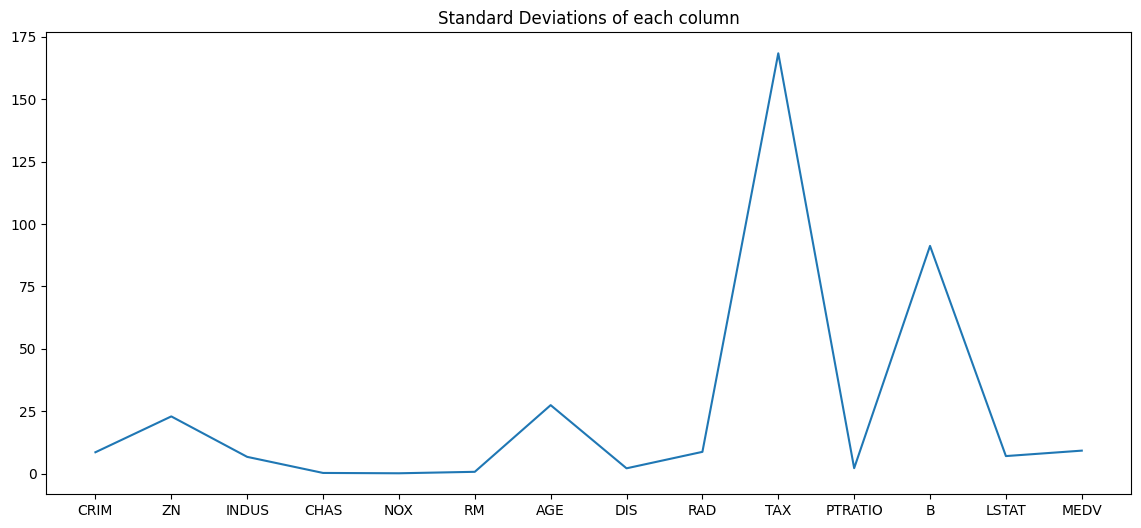

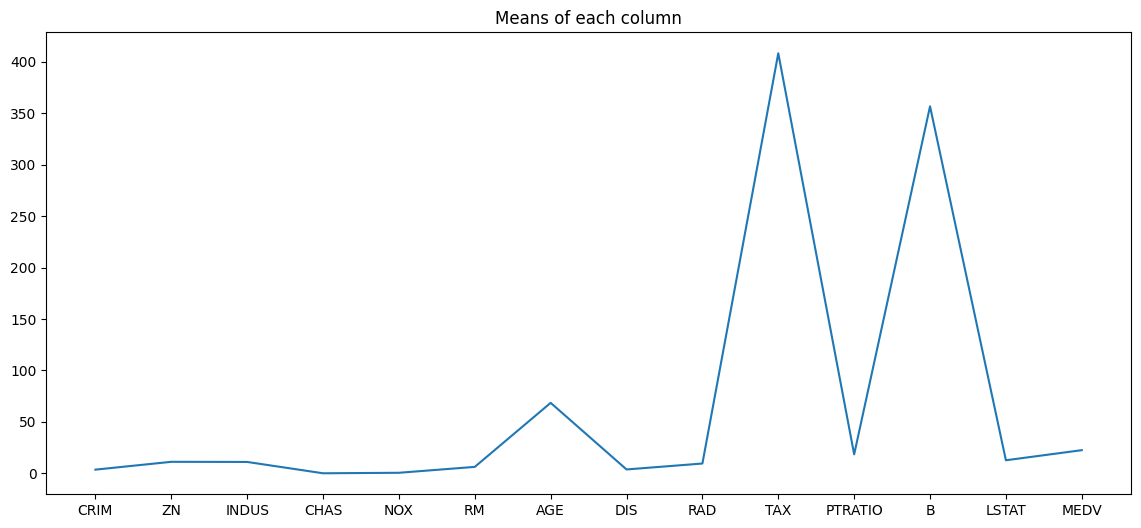

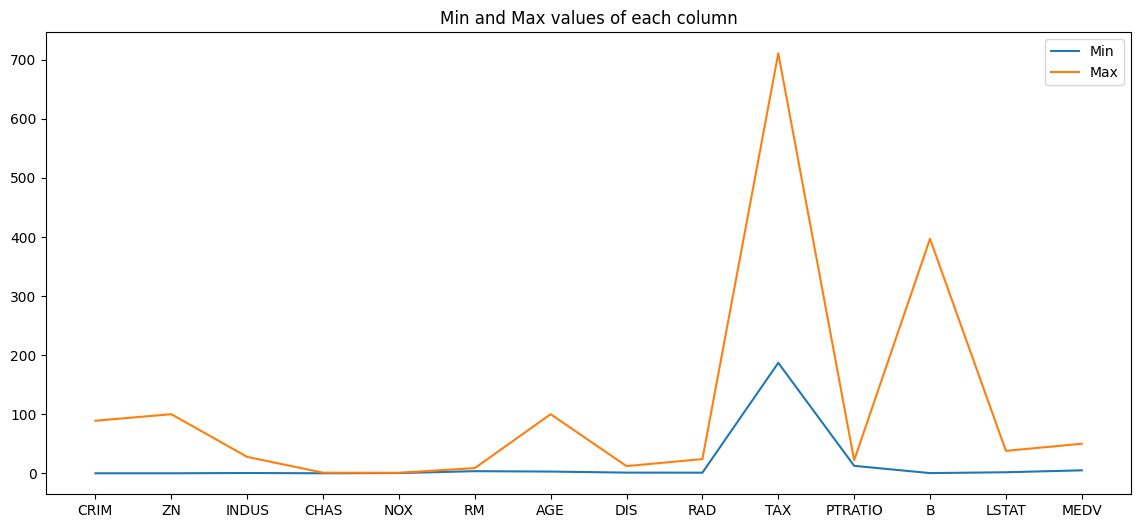

In [3]:
# finding mean of each column
means = []
for i in range(len(headers)):
    means.append(np.mean(data[:,i]))
    
# finding standard deviation of each column
stds = []
for i in range(len(headers)):
    stds.append(np.std(data[:,i]))
    
# finding min of each column
mins = []
for i in range(len(headers)):
    mins.append(np.min(data[:,i]))
    
# finding max of each column
maxs = []
for i in range(len(headers)):
    maxs.append(np.max(data[:,i]))
    
print(headers)
print('Means: ', means)
print('Standard Deviations: ', stds)
print('Min values: ', mins)
print('Max values: ', maxs)

plt.figure(figsize=(14,6))
plt.plot(headers, stds)
plt.title('Standard Deviations of each column')
plt.show()

plt.figure(figsize=(14,6))
plt.plot(headers, means)
plt.title('Means of each column')
plt.show()

# plot min and max values
plt.figure(figsize=(14,6))
plt.plot(headers, mins, label='Min')
plt.plot(headers, maxs, label='Max')
plt.legend()
plt.title('Min and Max values of each column')
plt.show()

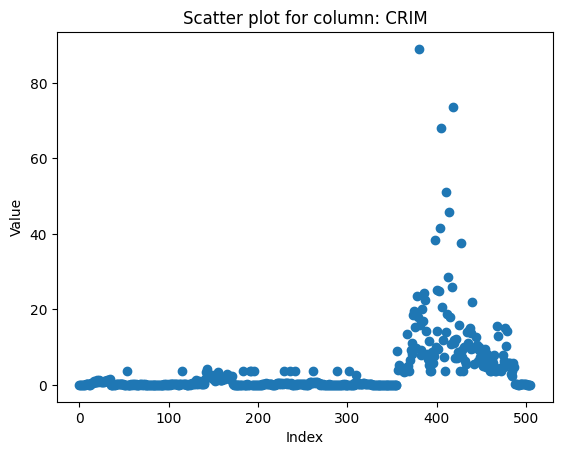

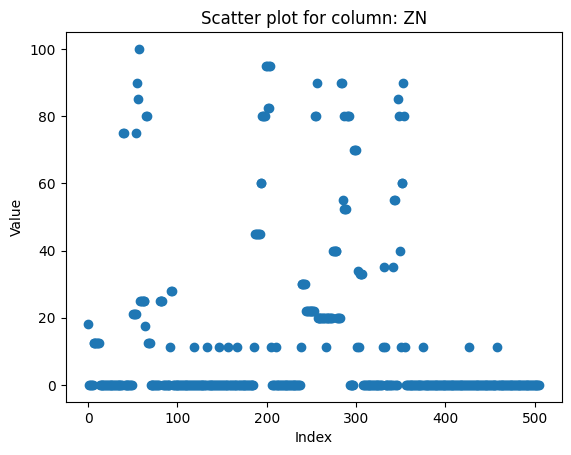

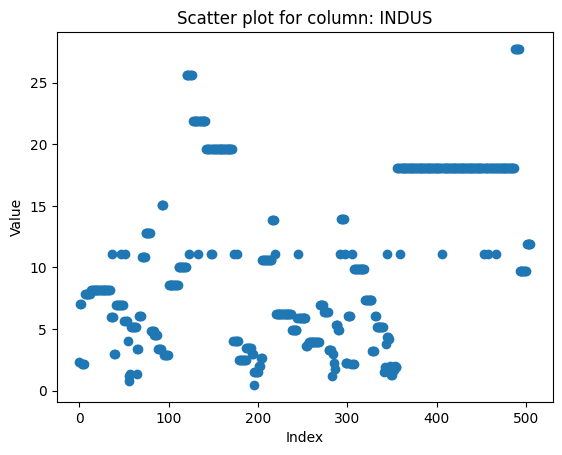

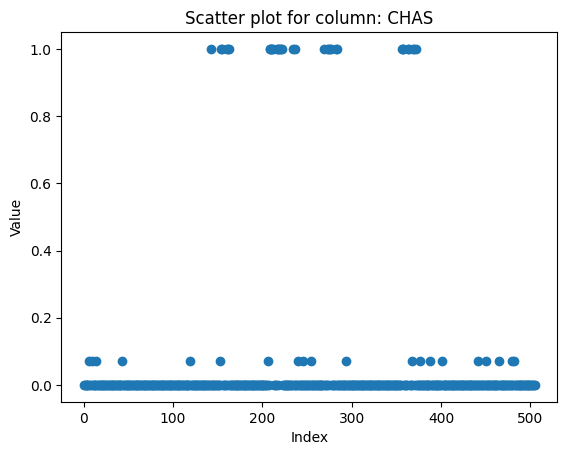

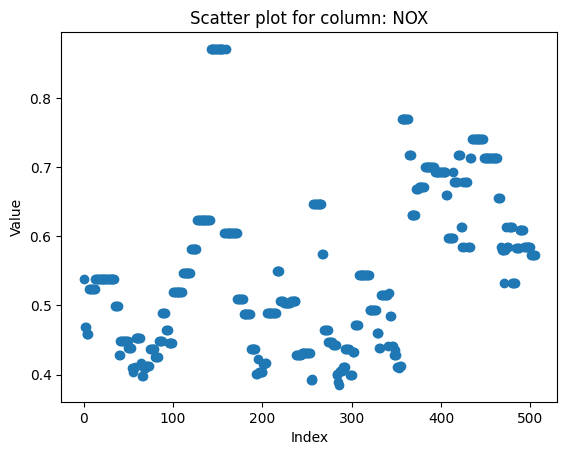

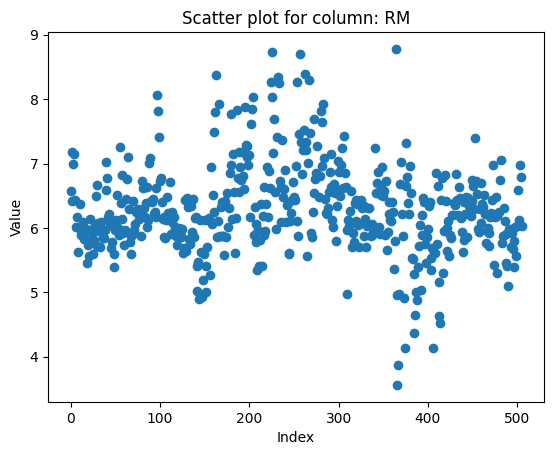

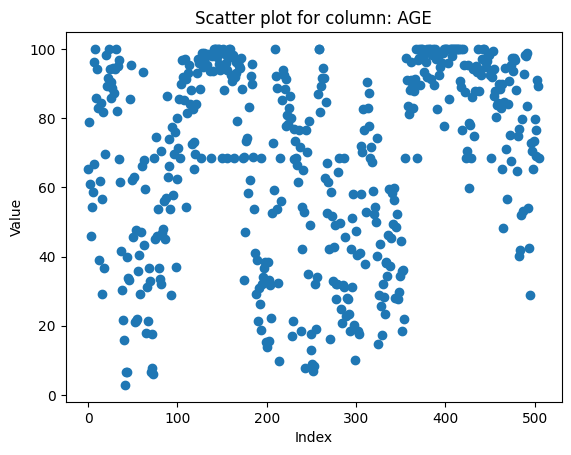

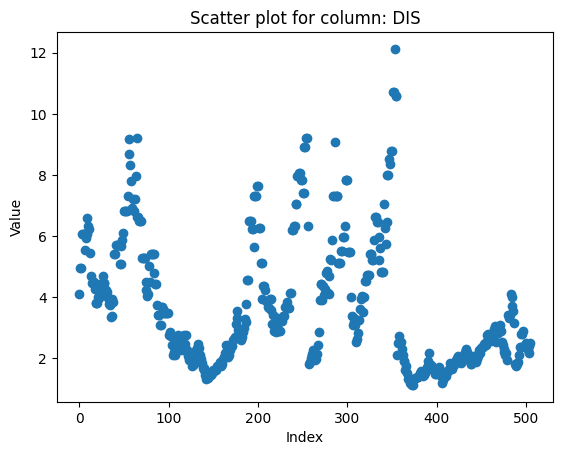

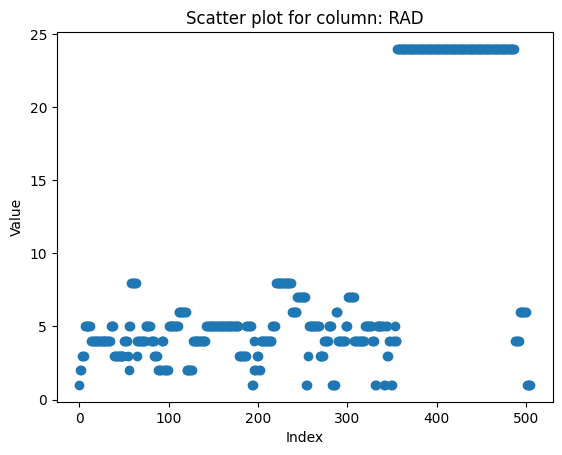

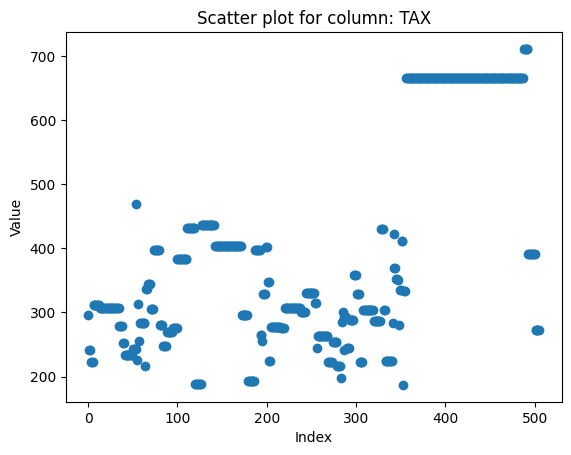

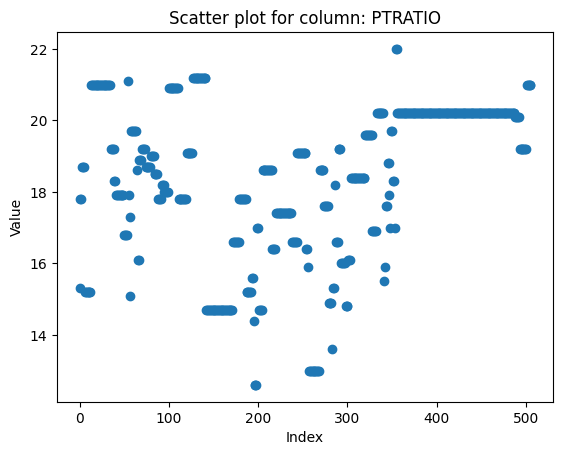

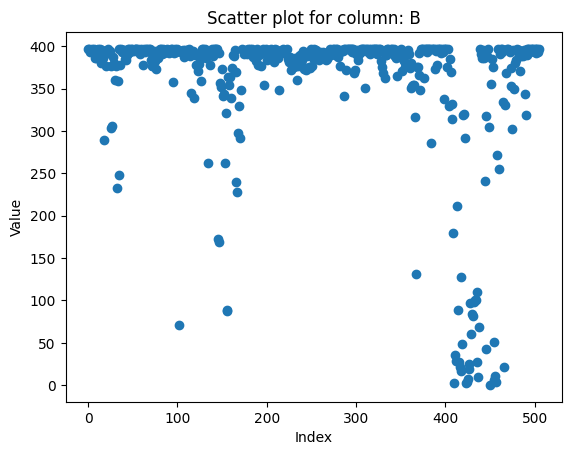

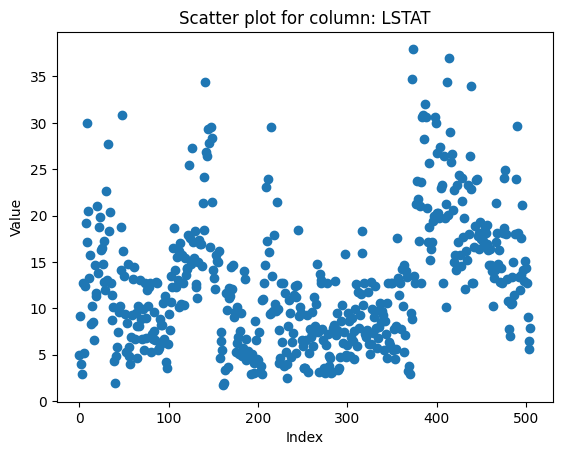

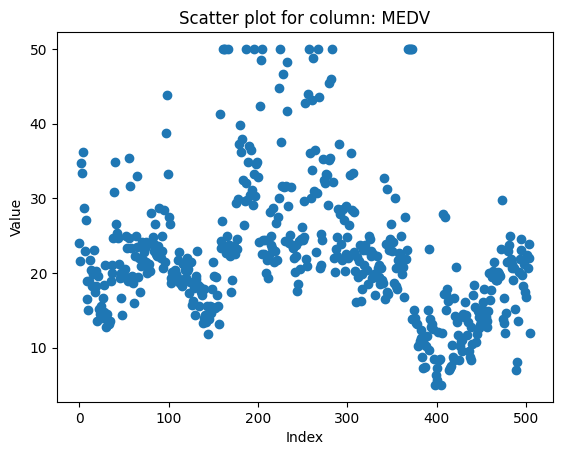

In [4]:
for i in range(len(headers)):
    plt.scatter(range(len(data[:,i])), data[:,i])
    plt.title('Scatter plot for column: '+headers[i])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

In [5]:
# dropping the medv
normalised_data = preprocessing.StandardScaler().fit_transform(data)
medv = data[:, -1]
data = normalised_data
headers = headers[:-1]
data = data[:, :-1]

df = pd.DataFrame(data, columns=headers)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.422328,0.296443,-1.311010,-0.279851,-0.144217,0.413672,-1.210593e-01,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.104146e+00
1,-0.419870,-0.489639,-0.599771,-0.279851,-0.740262,0.194274,3.787156e-01,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-5.103527e-01
2,-0.419872,-0.489639,-0.599771,-0.279851,-0.740262,1.282714,-2.706270e-01,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.239748e+00
3,-0.419277,-0.489639,-1.330435,-0.279851,-0.835284,1.016303,-8.287698e-01,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.395333e+00
4,-0.414981,-0.489639,-1.330435,-0.279851,-0.835284,1.228577,-5.223385e-01,1.077737,-0.752922,-1.106115,0.113032,0.441052,-7.606649e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.415733,-0.489639,0.126411,-0.279851,0.158124,0.439316,2.121240e-02,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-7.606649e-16
502,-0.417766,-0.489639,0.126411,-0.279851,0.158124,-0.234548,2.984598e-01,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-5.189170e-01
503,-0.415952,-0.489639,0.126411,-0.279851,0.158124,0.984960,8.201227e-01,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-1.009938e+00
504,-0.410232,-0.489639,0.126411,-0.279851,0.158124,0.725672,7.581068e-01,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-8.900378e-01


In [6]:
# Splitting data into train, validation and test sets

X_train, X_test, y_train, y_test = train_test_split(np.arange(data.shape[0]), np.arange(medv.shape[0]), test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

X_train = data[X_train]
X_val = data[X_val]
X_test = data[X_test]

y_train = medv[y_train]
y_val = medv[y_val]
y_test = medv[y_test]

# Multi Layer Perceptron Regression

## Implementation

In [7]:
class MLPRegression:
    def __init__(self, lr, activation_func, optimizer, hidden_layer_sizes, max_epochs=2000, print_stats=False, batch_size=3):
        self.learning_rate = lr
        self.activation_func = activation_func
        self.optimizer = optimizer
        self.hidden_layer_sizes = hidden_layer_sizes
        self.hidden_layers = len(hidden_layer_sizes)
        self.print_stats = print_stats
        self.max_epochs = max_epochs
        self.prev_loss = None
        self.weights = None
        self.biases = None
        self.weights_grad = None
        self.biases_grad = None
        self.batch_size = batch_size
    
    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    
    def relu(self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.where(x > 0, x, 0)
    
    def tanh(self, x, derivative=False):
        if derivative:
            return 1 - np.tanh(x) ** 2
        return np.tanh(x)
    
    def forward_propagation(self, X):
        z = []
        # input layer
        z.append(X)
        x = np.matmul(X, self.weights[0]) + self.biases[0]            
        next_x = self.activation_funcs[0](x)
                    
        # hidden layers
        for i in range(1, self.hidden_layers):
            z.append(next_x)
            x = np.matmul(next_x, self.weights[i]) + self.biases[i]
            next_x = self.activation_funcs[i](x)
            
        # output layer
        z.append(next_x)
        final = np.matmul(next_x, self.weights[-1]) + self.biases[-1]
        
        return z, final
    
    def backpropagation(self, final, z, y):
        # output layer
        # print("backprop")
        # p = final - y
        op_grad = np.diag(2 * (final - y)).reshape(-1, 1)
        
        # hidden layers
        for i in range(self.hidden_layers, -1, -1):
            # print(z[i].shape, op_grad.shape)
            dw = z[i].reshape(z[i].shape[0], z[i].shape[1], 1)
            op = op_grad.reshape(op_grad.shape[0], 1, op_grad.shape[1])
            # print(dw.shape, op.shape)
            # print(dw)
            # print(op)
            self.weights_grad[i] = np.sum(dw * op, axis=0)
            self.biases_grad[i] = np.sum(op_grad, axis=0)
            if i == 0:
                break
            dz = np.matmul(op_grad, self.weights[i].T) / op_grad.shape[0]
            
            dz = dz * self.activation_funcs[i-1](z[i], derivative=True)
            
            op_grad = dz
        
        return self.weights_grad, self.biases_grad
        
    def fit(self, X, y, X_val, y_val):
        
        if self.activation_func == 'sigmoid':
            self.activation_func = self.sigmoid
        elif self.activation_func == 'relu':
            self.activation_func = self.relu
        elif self.activation_func == 'tanh':
            self.activation_func = self.tanh
        else:
            raise Exception('Invalid activation function')
        
        if self.optimizer == 'sgd':
            self.batch_size = 1
        elif self.optimizer == 'batch':
            self.batch_size = X.shape[0]
        elif self.optimizer == 'mini-batch':
            self.batch_size = self.batch_size
            if self.batch_size > X.shape[0] or self.batch_size < 1 or X.shape[0] % self.batch_size != 0:
                raise Exception('Invalid batch size')
        else:
            raise Exception('Invalid optimizer')
        
        # can non-linearize from outside
        self.activation_funcs = []
        for i in range(self.hidden_layers):
            self.activation_funcs.append(self.activation_func)                
        
        self.weights = []
        self.biases = []
                
        weights = []
        biases = []
        weights_grad = []
        biases_grad = []
                
        # input layer
        weights.append(np.random.randn(X.shape[1], self.hidden_layer_sizes[0]))
        biases.append(np.zeros((self.hidden_layer_sizes[0])))
        weights_grad.append(np.zeros((X.shape[1], self.hidden_layer_sizes[0])))
        biases_grad.append(np.zeros((self.hidden_layer_sizes[0])))
        
        # hidden layers until last hidden layer
        for i in range(self.hidden_layers - 1):
            weights.append(np.random.randn(self.hidden_layer_sizes[i], self.hidden_layer_sizes[i+1]))
            biases.append(np.zeros((self.hidden_layer_sizes[i+1])))
            weights_grad.append(np.zeros((self.hidden_layer_sizes[i], self.hidden_layer_sizes[i+1])))
            biases_grad.append(np.zeros((self.hidden_layer_sizes[i+1])))
            
        # last hidden layer
        weights.append(np.random.randn(self.hidden_layer_sizes[-1], 1))
        biases.append(np.zeros((1)))
        weights_grad.append(np.zeros((self.hidden_layer_sizes[-1], 1)))
        biases_grad.append(np.zeros((1)))
        
        losses = []
        
        self.weights = weights
        self.biases = biases
        self.weights_grad = weights_grad
        self.biases_grad = biases_grad
        
        full_X = X
        full_y = y
        
        epochs = 0
        val_mse = []
        train_mse = []
        train_r2 = []
        val_r2 = []
        
        while True:
            # shuffle data
            p = np.random.permutation(full_X.shape[0])
            X = full_X[p]
            y = full_y[p]
            
            X = X.reshape(-1, self.batch_size, X.shape[1])
            y = y.reshape(-1, self.batch_size)            
            
            sum = 0
            for i in range(X.shape[0]):
                # forward propagation
                z, final = self.forward_propagation(X[i])
                
                # backpropagation
                self.backpropagation(final, z, y[i])
                    
                # update weights
                for j in range(self.hidden_layers + 1):
                    self.weights[j] -= self.learning_rate * self.weights_grad[j]
                    self.biases[j] -= self.learning_rate * self.biases_grad[j]
                                
                # calculate loss
                p = metrics.mean_squared_error(y[i], final)
                loss = np.mean(p)
                sum += loss
            sum /= X.shape[0]
            losses.append(sum)
            loss = sum
            
            y_pred = self.predict(full_X)
            train_mse.append(metrics.mean_squared_error(full_y, y_pred))
            train_r2 = metrics.r2_score(full_y, y_pred)
            
            y_pred = self.predict(X_val)
            val_mse.append(metrics.mean_squared_error(y_val, y_pred))
            val_r2 = metrics.r2_score(y_val, y_pred)
                
            epochs += 1
            if self.print_stats and (epochs % 100 == 0 or epochs == 1):
                print('Epoch: ', epochs, 'Loss: ', loss, 'Train MSE: ', train_mse[-1], 'Val MSE: ', val_mse[-1], 'Train R2: ', train_r2, 'Val R2: ', val_r2)
                
            if epochs > self.max_epochs or (self.prev_loss is not None and np.abs(self.prev_loss - loss) < 1e-5):
                self.prev_loss = loss
                break
        if self.print_stats:    
            plt.plot(range(len(losses)), losses)
            plt.title('Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()              
            
        return weights, biases, train_mse, val_mse, train_r2, val_r2
            
    def predict(self, X):        
        z, final = self.forward_propagation(X)
        return final

Epoch:  1 Loss:  457.7246052555567 Train MSE:  371.71992712202297 Val MSE:  378.20969932751825 Train R2:  -3.4809994468827155 Val R2:  -4.2937319271332575
Epoch:  100 Loss:  17.07210011129662 Train MSE:  16.831878975897094 Val MSE:  24.440422721393283 Train R2:  0.7970955149890775 Val R2:  0.6579118771863315
Epoch:  200 Loss:  10.531014911330358 Train MSE:  10.333375016900174 Val MSE:  20.706809327852593 Train R2:  0.8754335069048871 Val R2:  0.7101705803874967
Epoch:  300 Loss:  8.818317594853692 Train MSE:  8.645378654019556 Val MSE:  20.17392519144188 Train R2:  0.8957819203649089 Val R2:  0.7176292620960727
Epoch:  400 Loss:  8.032560713544946 Train MSE:  7.845133063409526 Val MSE:  19.62361834251092 Train R2:  0.9054286995318399 Val R2:  0.7253318063224259
Epoch:  500 Loss:  7.5007907381604335 Train MSE:  7.351475537046934 Val MSE:  19.35007529798106 Train R2:  0.9113796290924554 Val R2:  0.7291605382424367


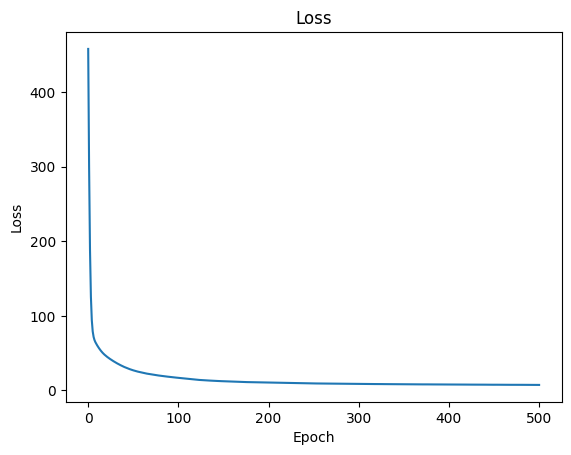

In [8]:
mlp = MLPRegression(1e-4, 'sigmoid', 'sgd', [7,7], 500, True)
_, _, _, _, _, _ = mlp.fit(X_train, y_train, X_val, y_val)

## Hyperparameter Testing on W&B

In [ ]:
sweep_configuration = {
    "name": "mlp-regression-sweep",
    "metric": {"name": "val_mse", "goal": "minimize"},
    "method": "grid",
    "parameters": {"lr": {"values": [1e-3, 1e-4, 1e-5]},
                   "activation_func": {"values": ['sigmoid', 'relu', 'tanh']},
                   "optimizer": {"values": ['sgd', 'batch', 'mini-batch']},
                   "hidden_layers": {"values": [[6, 6], [7, 7], [8, 8], [6, 6, 6], [8,8,8]]}}
}

def my_train_func():
    # read the current value of parameter "a" from wandb.config
    wandb.init()
    lr = wandb.config.lr
    activation_func = wandb.config.activation_func
    optimizer = wandb.config.optimizer
    hidden_layers = wandb.config.hidden_layers
    
    mlp = MLPRegression(lr, activation_func, optimizer, hidden_layers, 500)
    _, _, train_mse, val_mse, train_r2, val_r2 = mlp.fit(X_train, y_train, X_val, y_val)
    train_rmse = np.sqrt(train_mse)
    val_rmse = np.sqrt(val_mse)
        
    for i in range(50, 501, 50):
        wandb.log({"train_mse": train_mse[i], "val_mse": val_mse[i], "train_rmse": train_rmse[i], "val_rmse": val_rmse[i], "train_r2": train_r2[i], "val_r2": val_r2[i], "epochs": i, "lr": lr, "activation_func": activation_func, "optimizer": optimizer, "hidden_layers": hidden_layers})


sweep_id = wandb.sweep(sweep_configuration, project='mlp-regression')

# run the sweep
wandb.agent(sweep_id, function=my_train_func)

,train_r2,hidden_layers,_step,_runtime,val_mse,lr,epochs,train_mse,val_r2,optimizer,val_rmse,train_rmse,_timestamp,activation_func
0,-0.063732,"[8, 8, 8]",0,31.487705,80.431174,0.00001,50,93.545493,-0.165374,mini-batch,8.968343,9.671892,1.697453e+09,tanh
1,0.077963,"[8, 8, 8]",1,31.487880,58.992081,0.00001,100,81.084710,0.145259,mini-batch,7.680630,9.004705,1.697453e+09,tanh
2,0.135117,"[8, 8, 8]",2,31.488021,58.331137,0.00001,150,76.058584,0.154835,mini-batch,7.637482,8.721157,1.697453e+09,tanh
3,0.188493,"[8, 8, 8]",3,31.488150,53.611192,0.00001,200,71.364602,0.223223,mini-batch,7.321966,8.447757,1.697453e+09,tanh
4,0.216471,"[8, 8, 8]",4,31.488271,50.861170,0.00001,250,68.904224,0.263068,mini-batch,7.131702,8.300857,1.697453e+09,tanh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.957006,"[6, 6]",5,89.505633,24.353356,0.00100,300,3.780915,0.647142,sgd,4.934912,1.944457,1.697446e+09,sigmoid
6,0.959375,"[6, 6]",6,89.505762,24.217808,0.00100,350,3.572612,0.649106,sgd,4.921159,1.890136,1.697446e+09,sigmoid
7,0.960599,"[6, 6]",7,89.505888,24.658595,0.00100,400,3.464981,0.642720,sgd,4.965742,1.861446,1.697446e+09,sigmoid
8,0.963417,"[6, 6]",8,89.506012,24.063429,0.00100,450,3.217152,0.651343,sgd,4.905449,1.793642,1.697446e+09,sigmoid


Total Runs:  135
Best Epochs:  50
Best Learning Rate:  0.001
Best Activation Function:  sigmoid
Best Optimizer:  sgd
Best Hidden Layers:  [8, 8]

For Validation Set:
MSE:  19.744573484200338
RMSE:  4.443486635987593
R-2 Score:  0.7139192700486818


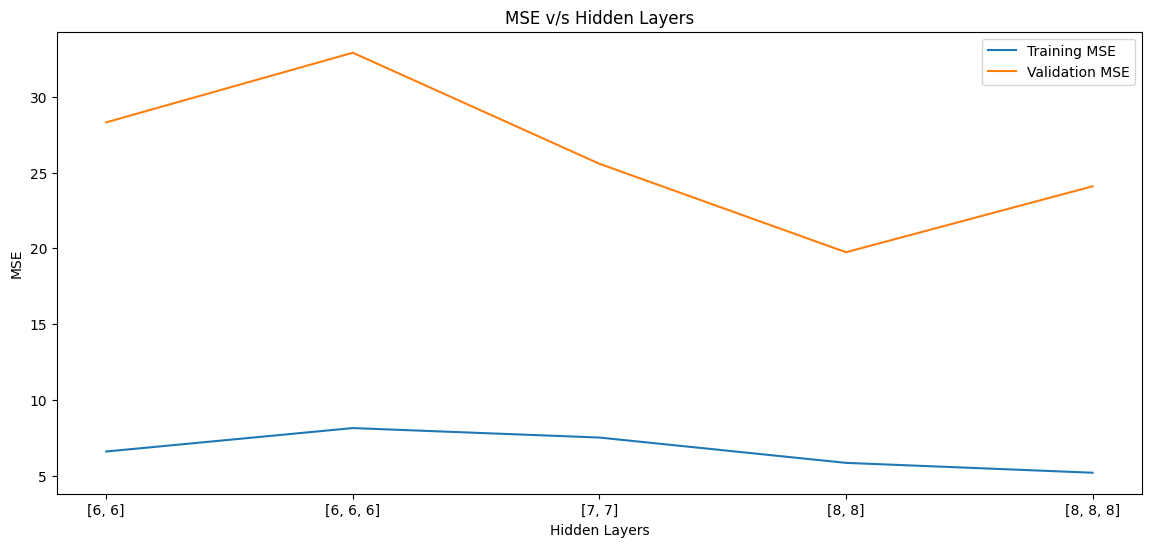

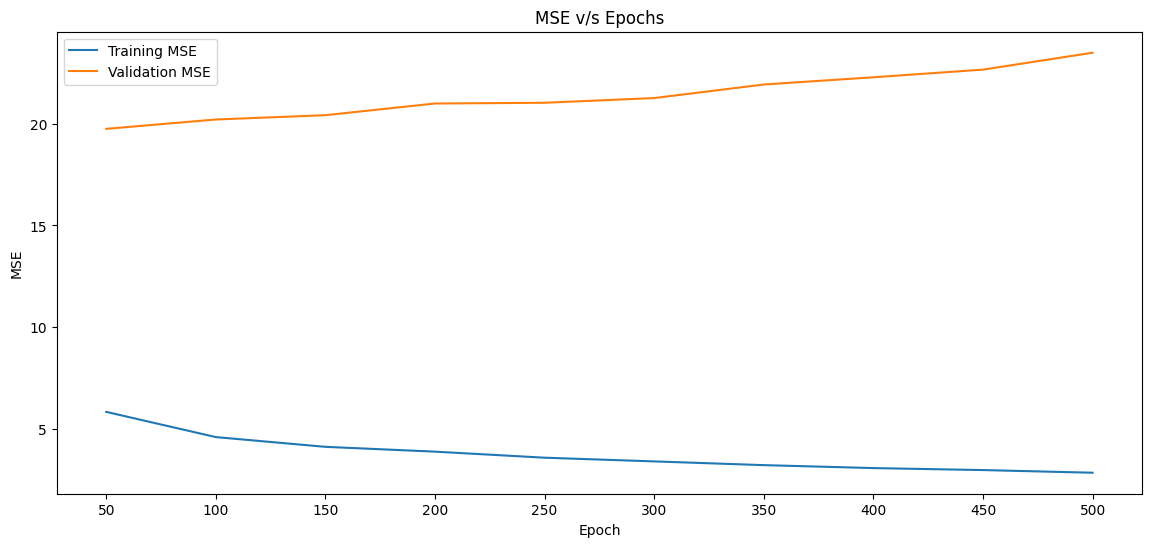

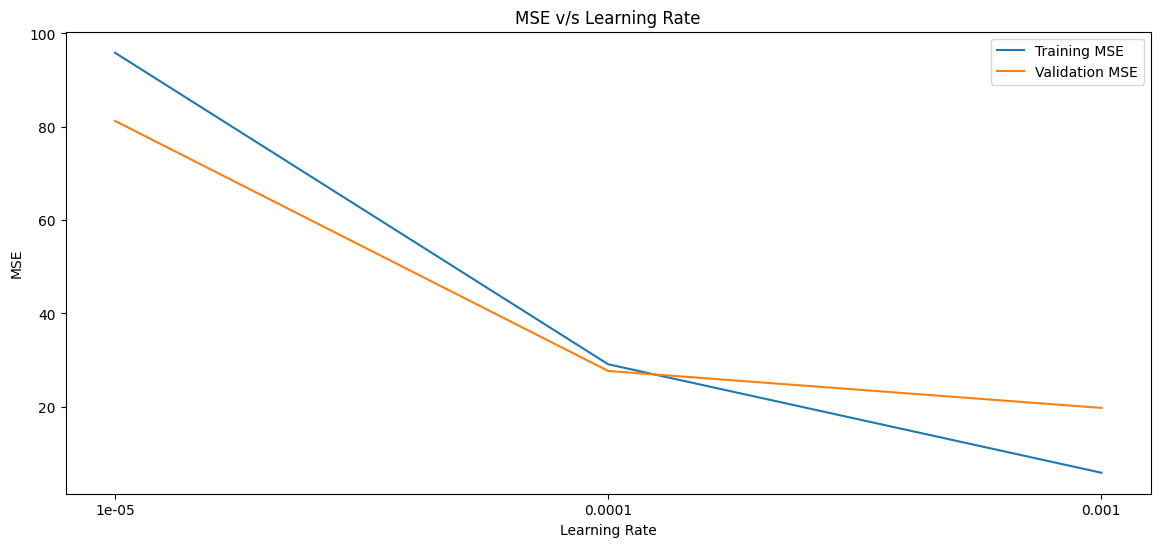

,val_mse,train_mse,val_rmse,train_rmse,val_r2,train_r2,epochs,lr,activation_func,optimizer,hidden_layers
0,19.744573,5.847204,4.443487,2.418099,0.713919,0.933510,50,0.00100,sigmoid,sgd,"[8, 8]"
1,20.204181,4.608498,4.494906,2.146741,0.707260,0.947595,100,0.00100,sigmoid,sgd,"[8, 8]"
2,20.416079,4.130353,4.518416,2.032327,0.704190,0.953033,150,0.00100,sigmoid,sgd,"[8, 8]"
2,20.972720,7.619038,4.579598,2.760261,0.696125,0.913362,150,0.00100,sigmoid,mini-batch,"[6, 6]"
3,20.989535,3.893957,4.581434,1.973311,0.695881,0.955721,200,0.00100,sigmoid,sgd,"[8, 8]"
...,...,...,...,...,...,...,...,...,...,...,...
2,332.175338,165.633686,18.225678,12.869875,-3.812915,-0.883467,150,0.00001,relu,batch,"[8, 8, 8]"
0,341.551013,339.243805,18.481099,18.418572,-3.948760,-2.857636,50,0.00001,tanh,batch,"[6, 6]"
0,348.268362,346.241001,18.661950,18.607552,-4.046089,-2.937203,50,0.00001,tanh,batch,"[8, 8, 8]"
1,365.558655,209.349105,19.119588,14.468901,-4.296609,-1.380567,100,0.00001,relu,batch,"[8, 8, 8]"


In [9]:
api = wandb.Api()

runs = api.runs("sarthakchittawar/mlp-regression")
count = 0

df = None

while True:
    try:
        run = runs[count]
        count += 1
        if count == 1:
            df = pd.json_normalize([row for row in run.scan_history()])
        else:
            df = pd.concat([df, pd.json_normalize([row for row in run.scan_history()])], axis=0)
    except:
        break

display(df)
    
print('Total Runs: ', count)

df = df.sort_values(by=['val_mse'], ascending=True)

row = df.iloc[0]

epochs = row['epochs']
learning_rate = row['lr']
activation_func = row['activation_func']
optimizer = row['optimizer']
hidden_layers = row['hidden_layers']

print('Best Epochs: ', epochs)
print('Best Learning Rate: ', learning_rate)
print('Best Activation Function: ', activation_func)
print('Best Optimizer: ', optimizer)
print('Best Hidden Layers: ', hidden_layers)
print("\nFor Validation Set:")
print('MSE: ', row['val_mse'])
print('RMSE: ', row['val_rmse'])
print('R-2 Score: ', row['val_r2'])

# # find all rows with given parameters of hidden layers and epochs i.e. in one go
df2 = df
df = df[(df['epochs'] == epochs) & (df['lr'] == learning_rate) & (df['activation_func'] == activation_func) & (df['optimizer'] == optimizer)]
df = df.sort_values(by=['hidden_layers'])
# plot train and val accuracy for each hidden layer size
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_mse'])), df['train_mse'], label='Training MSE')
plt.plot(range(len(df['val_mse'])), df['val_mse'], label='Validation MSE')
plt.title('MSE v/s Hidden Layers')
plt.xlabel('Hidden Layers')
plt.ylabel('MSE')
plt.xticks(range(len(df['hidden_layers'])), df['hidden_layers'])
plt.legend()
plt.show()

b=[]
for i in df2['hidden_layers']:
    if i == hidden_layers:
        b.append(True)
    else:
        b.append(False)

df = df2[b & (df2['lr'] == learning_rate) & (df2['activation_func'] == activation_func) & (df2['optimizer'] == optimizer)]
df = df.sort_values(by=['epochs'])
# plot train and val accuracy for each epoch
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_mse'])), df['train_mse'], label='Training MSE')
plt.plot(range(len(df['val_mse'])), df['val_mse'], label='Validation MSE')
plt.title('MSE v/s Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.xticks(range(len(df['epochs'])), df['epochs'])
plt.legend()
plt.show()

df = df2[(df2['epochs'] == epochs) & b & (df2['activation_func'] == activation_func) & (df2['optimizer'] == optimizer)]
df = df.sort_values(by=['lr'])
# plot train and val accuracy for each learning rate
plt.figure(figsize=(14,6))
plt.plot(range(len(df['train_mse'])), df['train_mse'], label='Training MSE')
plt.plot(range(len(df['val_mse'])), df['val_mse'], label='Validation MSE')
plt.title('MSE v/s Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.xticks(range(len(df['lr'])), df['lr'])
plt.legend()
plt.show()

df2 = df2[['val_mse', 'train_mse', 'val_rmse', 'train_rmse', 'val_r2', 'train_r2', 'epochs', 'lr', 'activation_func', 'optimizer', 'hidden_layers']]
df2

## Testing

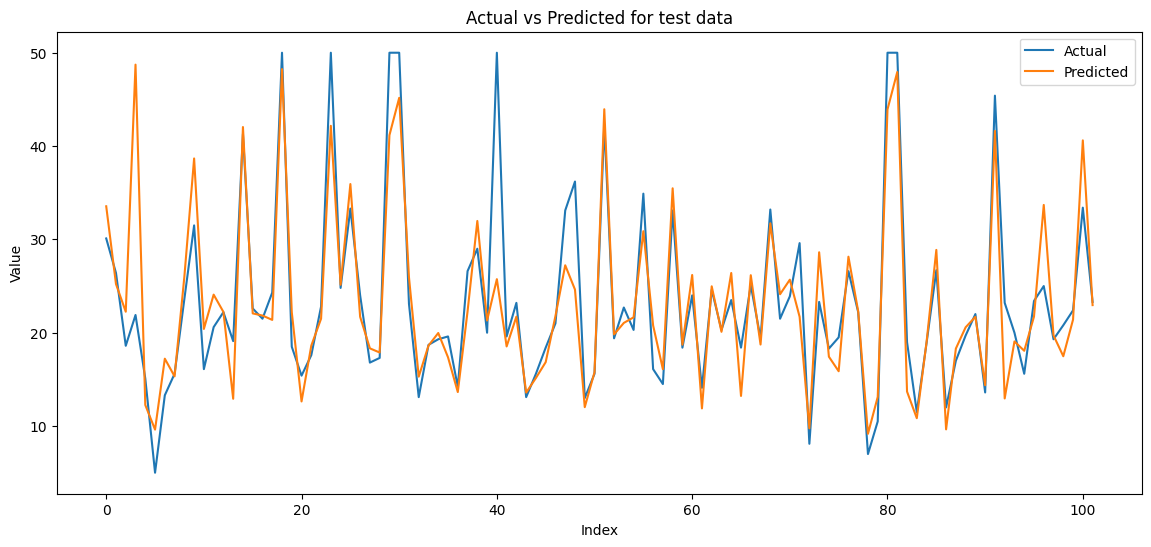

MSE:  24.800821339766156
RMSE:  4.9800423030097
R-2 Score:  0.753009643736317


In [11]:
mlp = MLPRegression(learning_rate, activation_func, optimizer, hidden_layers, epochs, False)
mlp.fit(X_train, y_train, X_val, y_val)
y_pred = mlp.predict(X_test)

plt.figure(figsize=(14,6))
plt.plot(np.arange(y_test.shape[0]), y_test, label='Actual')
plt.plot(np.arange(y_pred.shape[0]), y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted for test data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2 Score: ', metrics.r2_score(y_test, y_pred))